#  Fetching the data 



In [3]:
# using CurlWget

!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1594633592&Signature=PjjHj7p8FG5sUTGGeBGB%2FE7kCUW5uhc7eUz6ekln3ISDnrg1vo845DVT0%2FQCyt8KwGtSZ0hf9c86kfzIseGtR94Ae77SwCGig2hy2IRCGi5Fbw1Hjmj4dQHPeOR0wYoaUtQTUM8NYgZkZbsHICeGzblvhF4%2Fkthz2OSu6pk8kKBU3Q6ITjZV3%2Fpj%2FKIpBARH%2Ff9irshimcecf0xczZoNGnsQNH0HjrHKb9QI7L4q9dcUfez7l%2FnzlucEUSmWFgcIUBov7pRiddQRWvk7Gq3Gx1KxcTEASVD7%2B1KsiMxAiHoTCH7gL5P87JPstdsduhoGQi7Tyryigtnsf1%2BU2Z%2B54w%3D%3D&response-content-disposition=attachment%3B+filename%3Dreducing-commercial-aviation-fatalities.zip" -c -O 'reducing-commercial-aviation-fatalities.zip'

--2020-07-10 09:46:54--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11835/224935/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1594633592&Signature=PjjHj7p8FG5sUTGGeBGB%2FE7kCUW5uhc7eUz6ekln3ISDnrg1vo845DVT0%2FQCyt8KwGtSZ0hf9c86kfzIseGtR94Ae77SwCGig2hy2IRCGi5Fbw1Hjmj4dQHPeOR0wYoaUtQTUM8NYgZkZbsHICeGzblvhF4%2Fkthz2OSu6pk8kKBU3Q6ITjZV3%2Fpj%2FKIpBARH%2Ff9irshimcecf0xczZoNGnsQNH0HjrHKb9QI7L4q9dcUfez7l%2FnzlucEUSmWFgcIUBov7pRiddQRWvk7Gq3Gx1KxcTEASVD7%2B1KsiMxAiHoTCH7gL5P87JPstdsduhoGQi7Tyryigtnsf1%2BU2Z%2B54w%3D%3D&response-content-disposition=attachment%3B+filename%3Dreducing-commercial-aviation-fatalities.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 108.177.11.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2290631660 (2.1G) [application/zip]
Saving to: ‘redu

In [5]:
# unzipping the folders

!unzip /home/nehasinghsikerwar/Reducing_commercial_Aviation_fatalities/reducing-commercial-aviation-fatalities.zip -d /home/nehasinghsikerwar/Reducing_commercial_Aviation_fatalities


Archive:  /home/nehasinghsikerwar/Reducing_commercial_Aviation_fatalities/reducing-commercial-aviation-fatalities.zip
  inflating: /home/nehasinghsikerwar/Reducing_commercial_Aviation_fatalities/sample_submission.csv  
  inflating: /home/nehasinghsikerwar/Reducing_commercial_Aviation_fatalities/test.csv  
  inflating: /home/nehasinghsikerwar/Reducing_commercial_Aviation_fatalities/train.csv  


# Reading the data

In [1]:

# importing important libraries

import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import gc
import lightgbm as lgb

In [2]:
# https://www.kaggle.com/kamalchhirang/forgot-to-shuffle-the-data-while-splitting-boom

# Memory Optimization

def memory_opt(data):
    
    "will change the datatypes of the columns for optimal memory usage "

    initial_memory = data.memory_usage().sum() / 1024**2
    print(' Initial Memory of the dataframe is {:.2f} '.format(initial_memory))
    
    for c in data.columns:
        column_type = data[c].dtype
        
        if column_type != object:
            min_val = data[c].min()
            max_val = data[c].max()
            if str(column_type)[:3] == 'int':
                if min_val > np.iinfo(np.int8).min and max_val < np.iinfo(np.int8).max:
                    data[c] = data[c].astype(np.int8)
                elif min_val > np.iinfo(np.int16).min and max_val < np.iinfo(np.int16).max:
                    data[c] = data[c].astype(np.int16)
                elif min_val > np.iinfo(np.int32).min and max_val < np.iinfo(np.int32).max:
                    data[c] = data[c].astype(np.int32)
                elif min_val > np.iinfo(np.int64).min and max_val < np.iinfo(np.int64).max:
                    data[c] = data[c].astype(np.int64)  
            else:
                if min_val > np.finfo(np.float32).min and max_val < np.finfo(np.float32).max:
                    data[c] = data[c].astype(np.float32)
                else:
                    data[c] = data[c].astype(np.float64)
        else:
            data[c] = data[c].astype('category')

    final_memory = data.memory_usage().sum() / 1024**2
    print('after optimization, Memory is: {:.2f} '.format(final_memory))
    print('Reduced by {:.1f}%'.format(100 * (initial_memory - final_memory) / initial_memory))
    
    return data

https://github.com/pandas-dev/pandas/issues/20642

I am not using float16 dtype as it has some issues as mentioned in the above link. It gives nan while calculating the mean, so I'm passing the float32 and float64 as dtype in memory optimization function in above cell.

In [ ]:
train=pd.read_csv('train.csv')
train=memory_opt(train)
print(train.shape)

In [5]:
train.head()

crew experiment      time  seat   eeg_fp1     eeg_f7     eeg_f8     eeg_t4  \
0     1         CA  0.011719     1  -5.28545  26.775801  -9.527310 -12.793200   
1     1         CA  0.015625     1  -2.42842  28.430901  -9.323510  -3.757230   
2     1         CA  0.019531     1  10.67150  30.420200  15.350700  24.724001   
3     1         CA  0.023438     1  11.45250  25.609800   2.433080  12.412500   
4     1         CA  0.027344     1   7.28321  25.942600   0.113564   5.748000   

      eeg_t6     eeg_t5  ...     eeg_c4     eeg_p4    eeg_poz   eeg_c3  \
0  16.717800  33.737499  ...  37.368999  17.437599  19.201900  20.5968   
1  15.969300  30.443600  ...  31.170799  19.399700  19.689501  21.3547   
2  16.143101  32.142799  ... -12.012600  19.396299  23.171700  22.4076   
3  20.533300  31.494101  ...  18.574100  23.156401  22.641199  19.3367   
4  19.833599  28.753599  ...   6.555440  22.754700  22.670300  20.2932   

    eeg_cz     eeg_o2     ecg           r         gsr  event  
0 -3.95115  14.507600 -4520.0  817.705994  388.829987      A  
1  1.33212  17.750200 -4520.0  817.705994  388.829987      A  
2  1.53786  22.247000 -4520.0  817.705994  388.829987      A  
3  2.54492  18.998600 -4520.0  817.705994  388.829987      A  
4  1.69962  22.812799 -4520.0  817.705994  388.829987      A  

[5 rows x 28 columns]

In [34]:
test=pd.read_csv('test.csv')
test=memory_opt(test)
print(test.shape)

 Initial Memory of the dataframe is 3837.77 
after optimization, Memory is: 1764.69 
Reduced by 54.0%
(17965143, 28)


In [4]:
test.head()

id  crew experiment      time  seat    eeg_fp1     eeg_f7     eeg_f8  \
0   0     1       LOFT  0.000000     0  17.899500   6.127830   0.994807   
1   1     1       LOFT  0.000000     1  45.883202  94.749001  23.290800   
2   2     1       LOFT  0.003906     0  33.120098  28.356501  -7.239220   
3   3     1       LOFT  0.003906     1  43.280102  95.887001  18.702299   
4   4     1       LOFT  0.007812     0   7.929110   3.460380 -10.860800   

      eeg_t4     eeg_t6  ...     eeg_f4      eeg_c4    eeg_p4   eeg_poz  \
0 -28.206200 -47.695499  ...  -7.044480  -14.405100  -4.03384 -0.393799   
1   1.392000   2.060940  ...  19.887501 -215.179001   2.11832  7.340940   
2  -7.690860 -25.833799  ...  -7.642560  -10.363600  10.95050  6.513360   
3  -1.432890  -4.232600  ...  13.826600 -214.223007  -4.91354  3.504520   
4 -26.366699 -25.894699  ...   2.045450  -20.788799  -3.61418 -7.539830   

     eeg_c3       eeg_cz    eeg_o2          ecg           r         gsr  
0  31.83810    17.075600 -8.137350 -7323.120117  643.177002  594.778992  
1   9.66785  1169.239990 -0.024414 -3335.080078  826.724976  136.235001  
2  36.01860    24.356600  0.956158 -7323.120117  643.177002  594.778992  
3   3.87811  1159.400024 -0.047607 -3335.080078  826.724976  136.235001  
4   3.08397    13.647900  1.473720 -7323.120117  643.177002  594.778992  

[5 rows x 28 columns]

In [8]:
# encoding of categorical type features (label) and changing data type to int8

dict_1 = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
dict_2 = {'CA':0,'DA':1,'SS':3,'LOFT':4}

train['event'] = train['event'].apply(lambda x: dict_1[x])
train['event'] = train['event'].astype('int8')
train['experiment'] = train['experiment'].apply(lambda x: dict_2[x])
train['experiment'] = train['experiment'].astype('int8')

y_train = train['event']
y_train

0          0
1          0
2          0
3          0
4          0
          ..
4867416    0
4867417    0
4867418    0
4867419    0
4867420    0
Name: event, Length: 4867421, dtype: int8

In [15]:
dict_2 = {'CA':0,'DA':1,'SS':3,'LOFT':4}

test['experiment'] = test['experiment'].apply(lambda x: dict_2[x])
test['experiment'] = test['experiment'].astype('int8')


# EDA



In [30]:
train.columns

Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'],
      dtype='object')

In [31]:
test.columns

Index(['id', 'crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7',
       'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1',
       'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4',
       'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr'],
      dtype='object')

In [46]:
train.shape

(4867421, 28)

In [47]:
test.shape

(17965143, 28)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
crew          int8
experiment    int8
time          float32
seat          int8
eeg_fp1       float32
eeg_f7        float32
eeg_f8        float32
eeg_t4        float32
eeg_t6        float32
eeg_t5        float32
eeg_t3        float32
eeg_fp2       float32
eeg_o1        float32
eeg_p3        float32
eeg_pz        float32
eeg_f3        float32
eeg_fz        float32
eeg_f4        float32
eeg_c4        float32
eeg_p4        float32
eeg_poz       float32
eeg_c3        float32
eeg_cz        float32
eeg_o2        float32
ecg           float32
r             float32
gsr           float32
event         int8
dtypes: float32(24), int8(4)
memory usage: 464.2 MB


### Univariate analysis

In [17]:
train.describe()

crew    experiment          time          seat       eeg_fp1  \
count  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   5.538783e+00  1.296446e+00  1.782358e+02  4.999531e-01  3.746335e+00   
std    3.409353e+00  1.235775e+00  1.039592e+02  5.000000e-01  4.506762e+01   
min    1.000000e+00  0.000000e+00  3.000000e-03  0.000000e+00 -1.361360e+03   
25%    3.000000e+00  0.000000e+00  8.808100e+01  0.000000e+00 -9.200250e+00   
50%    5.000000e+00  1.000000e+00  1.769297e+02  0.000000e+00  3.819020e-01   
75%    7.000000e+00  3.000000e+00  2.683398e+02  1.000000e+00  1.030610e+01   
max    1.300000e+01  3.000000e+00  3.603711e+02  1.000000e+00  1.972240e+03   

             eeg_f7        eeg_f8        eeg_t4        eeg_t6        eeg_t5  \
count  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   1.360002e+00  1.213644e+00  7.350925e-02  7.845481e-02  8.675489e-02   
std    3.518923e+01  3.519242e+01  2.431472e+01  1.803932e+01  1.832606e+01   
min   -1.581330e+03 -1.643950e+03 -1.516640e+03 -1.220510e+03 -1.266430e+03   
25%   -8.325150e+00 -8.767610e+00 -7.367240e+00 -6.102000e+00 -6.007260e+00   
50%    4.264100e-02  1.140390e-01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    8.753340e+00  9.282560e+00  7.437780e+00  6.176630e+00  6.086460e+00   
max    2.048790e+03  2.145710e+03  1.731880e+03  9.009370e+02  1.176540e+03   

       ...        eeg_c4        eeg_p4       eeg_poz        eeg_c3  \
count  ...  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   ...  6.050046e-01  2.413972e-01  1.947634e-01  6.243715e-01   
std    ...  2.052105e+01  1.660196e+01  1.833801e+01  1.975695e+01   
min    ... -1.212030e+03 -1.228030e+03 -1.229130e+03 -1.230480e+03   
25%    ... -7.495970e+00 -6.713860e+00 -6.774840e+00 -7.161160e+00   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  7.765670e+00  6.831320e+00  6.905020e+00  7.466520e+00   
max    ...  8.917290e+02  9.080890e+02  1.435800e+03  9.284070e+02   

             eeg_cz        eeg_o2           ecg             r           gsr  \
count  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   4.429120e-01  2.393740e-01  5.285458e+03  7.376086e+02  8.518469e+02   
std    1.974815e+01  2.351859e+01  1.214126e+04  8.187979e+01  5.039324e+02   
min   -6.962790e+02 -1.176370e+03 -1.858570e+04  4.820600e+02  0.000000e+00   
25%   -7.817650e+00 -6.526950e+00 -2.550070e+03  6.631430e+02  5.241140e+02   
50%    0.000000e+00  0.000000e+00  5.920510e+03  7.434380e+02  7.701970e+02   
75%    8.025190e+00  6.615180e+00  1.029010e+04  8.134120e+02  1.197120e+03   
max    6.136690e+02  2.443550e+03  3.418830e+04  8.401840e+02  1.999860e+03   

              event  
count  4.867421e+06  
mean   8.509550e-01  
std    1.046899e+00  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    2.000000e+00  
max    3.000000e+00  

[8 rows x 28 columns]

descibe() function gives us the count, mean, standard deviation, min, max and percentile values of each column in the dataset.
we can see median (50 percentile) of most of the eeg features is nearly zero. From min, max and mean values somewhat it looks like gaussian distribution. We'll check the distributions with plotting.


In [21]:
# skewness checking

for i in train:
    print('skewness of',i,'is',train[i].skew())

skewness of crew is 0.8401397950267352
skewness of experiment is 0.43647528637257704
skewness of time is 0.023713753
skewness of seat is 0.0001877791721112034
skewness of eeg_fp1 is 4.4300733
skewness of eeg_f7 is 6.627159
skewness of eeg_f8 is 5.8071766
skewness of eeg_t4 is 0.2159868
skewness of eeg_t6 is 0.15133826
skewness of eeg_t5 is 2.92606
skewness of eeg_t3 is 4.6416698
skewness of eeg_fp2 is 5.424461
skewness of eeg_o1 is -8.095578
skewness of eeg_p3 is -0.73223907
skewness of eeg_pz is 1.9695033
skewness of eeg_f3 is 1.6009752
skewness of eeg_fz is -12.644516
skewness of eeg_f4 is -0.1869015
skewness of eeg_c4 is 0.3752349
skewness of eeg_p4 is -1.6026337
skewness of eeg_poz is 4.0142093
skewness of eeg_c3 is 0.06768693
skewness of eeg_cz is 0.5525345
skewness of eeg_o2 is 16.596567
skewness of ecg is 0.3957411
skewness of r is -0.5071985
skewness of gsr is 0.2555336
skewness of event is 0.5529129070212143




Highly skewed means skewness either less than -1 or more than 1. Moderately skewed means skewness either in between -1 and -0.5 or in between 1 and 0.5. Approximately symmetric means skewness in between 0.5 and -0.5.


1. Highly skewed features: eeg_fp1, eeg_f7, eeg_f8, eeg_t5, eeg_t3, eeg_fp2, eeg_o1, eeg_pz, eeg_f3, eeg_fz, eeg_p4, eeg_poz, eeg_o2

2. moderately skewed features: crew, eeg_p3, eeg_cz, r, event

3. Approximately symmetric features: experiment, time, seat, eeg_t4, eeg_t6, eeg_f4, eeg_c4, eeg_c3, ecg, gsr

In [8]:
# checking missing values

train.isnull().sum()

crew          0
experiment    0
time          0
seat          0
eeg_fp1       0
eeg_f7        0
eeg_f8        0
eeg_t4        0
eeg_t6        0
eeg_t5        0
eeg_t3        0
eeg_fp2       0
eeg_o1        0
eeg_p3        0
eeg_pz        0
eeg_f3        0
eeg_fz        0
eeg_f4        0
eeg_c4        0
eeg_p4        0
eeg_poz       0
eeg_c3        0
eeg_cz        0
eeg_o2        0
ecg           0
r             0
gsr           0
event         0
dtype: int64

No missing values

In [9]:
train['event'].value_counts()

0    2848809
2    1652686
3     235329
1     130597
Name: event, dtype: int64

as we can see from the count, our dataset is imbalanced dataset. Count of event 'SS' is the least and count of event 'A' = baseline is the max. We have to make the dataset more balanced before applying any model. Performance of models may vary because of data imbalance.

In [5]:
# https://www.kaggle.com/theoviel/starter-code-eda-and-lgbm-baseline

Event has lablled in following manner:

A = baseline = 0

B = SS = 1

C = CA = 2

D = DA = 3


Experiment has following values:

'CA':0

'DA':1

'SS':3

'LOFT':4

<IPython.core.display.Javascript object>


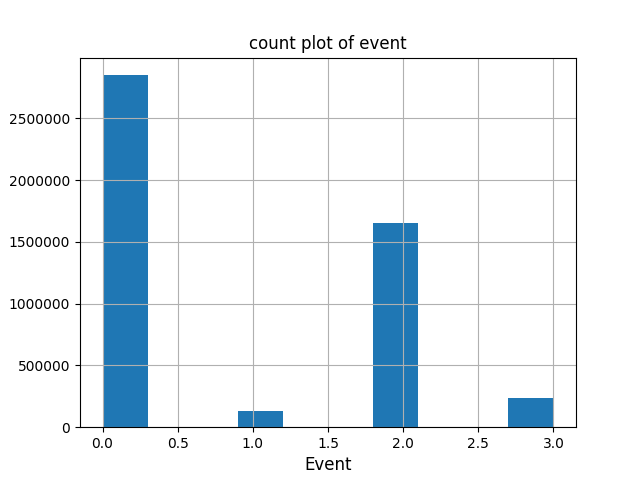

In [33]:
train['event'].hist()
plt.xlabel("Event", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title('count plot of event')
plt.show()

We have imbalanced dataset, as we can see for all 4 events count is different. Count of event 'SS' is the least and count of event 'A' = baseline is the max. We have to make the dataset more balanced before applying any model. Performance of models may vary because of data imbalance.

<IPython.core.display.Javascript object>


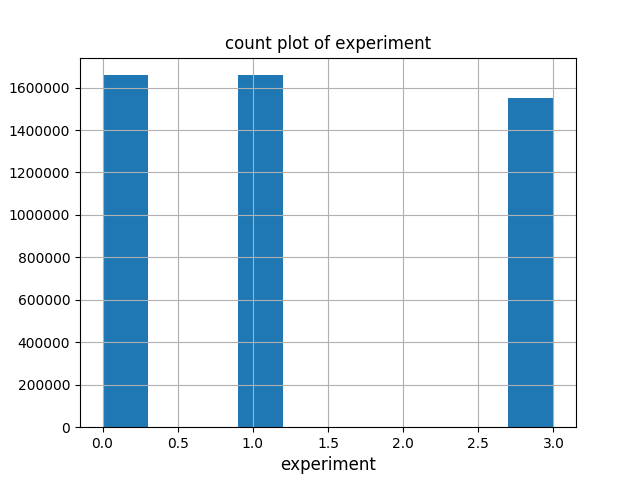

In [34]:
train['experiment'].hist()
plt.xlabel("experiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title('count plot of experiment')
plt.show()

Experiment 3 (SS) happened least number of times. Count for experiment 0 and experiment 1 is almost same, means experiment CA and DA conducted equal number of times.

Experiment 4 in the test set is LOFT (Line Oriented Flight Training), which is a full flight (take off, flight, and landing) in a flight simulator.

In [61]:
# creating a pilot column for train dataset by taking crew and seat columns

pilot=[]
for i in range(len(train)):
    pilot.append(train['crew'][i]*10+train['seat'][i])
    
print(set(pilot))
len(pilot)

{130, 131, 70, 71, 40, 41, 10, 11, 80, 81, 50, 51, 20, 21, 60, 61, 30, 31}


4867421

In [66]:
pil=pd.DataFrame(pilot,columns=['pilot'])

pil

pilot
0           11
1           11
2           11
3           11
4           11
...        ...
4867416    131
4867417    130
4867418    131
4867419    130
4867420    131

[4867421 rows x 1 columns]

<IPython.core.display.Javascript object>


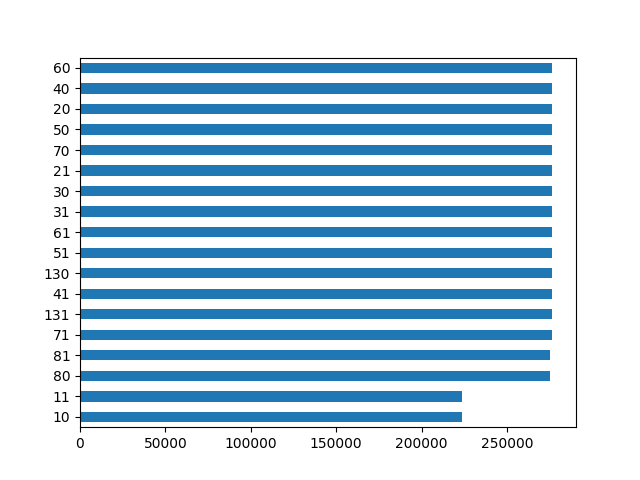

In [15]:
# plotting the count plot for pilot column

pil['pilot'].value_counts().sort_values().plot(kind = 'barh')
plt.show()

Every pilot has a different set of sensor reading values with multiple experiments performed as input, corresponding output is the event. From this plot we can see, Pilot 10 and 11 have min number of counts. Means experiment performed less with pilot 10 and 11 comparison to others. Other pilots have nearly the same counts.




<IPython.core.display.Javascript object>


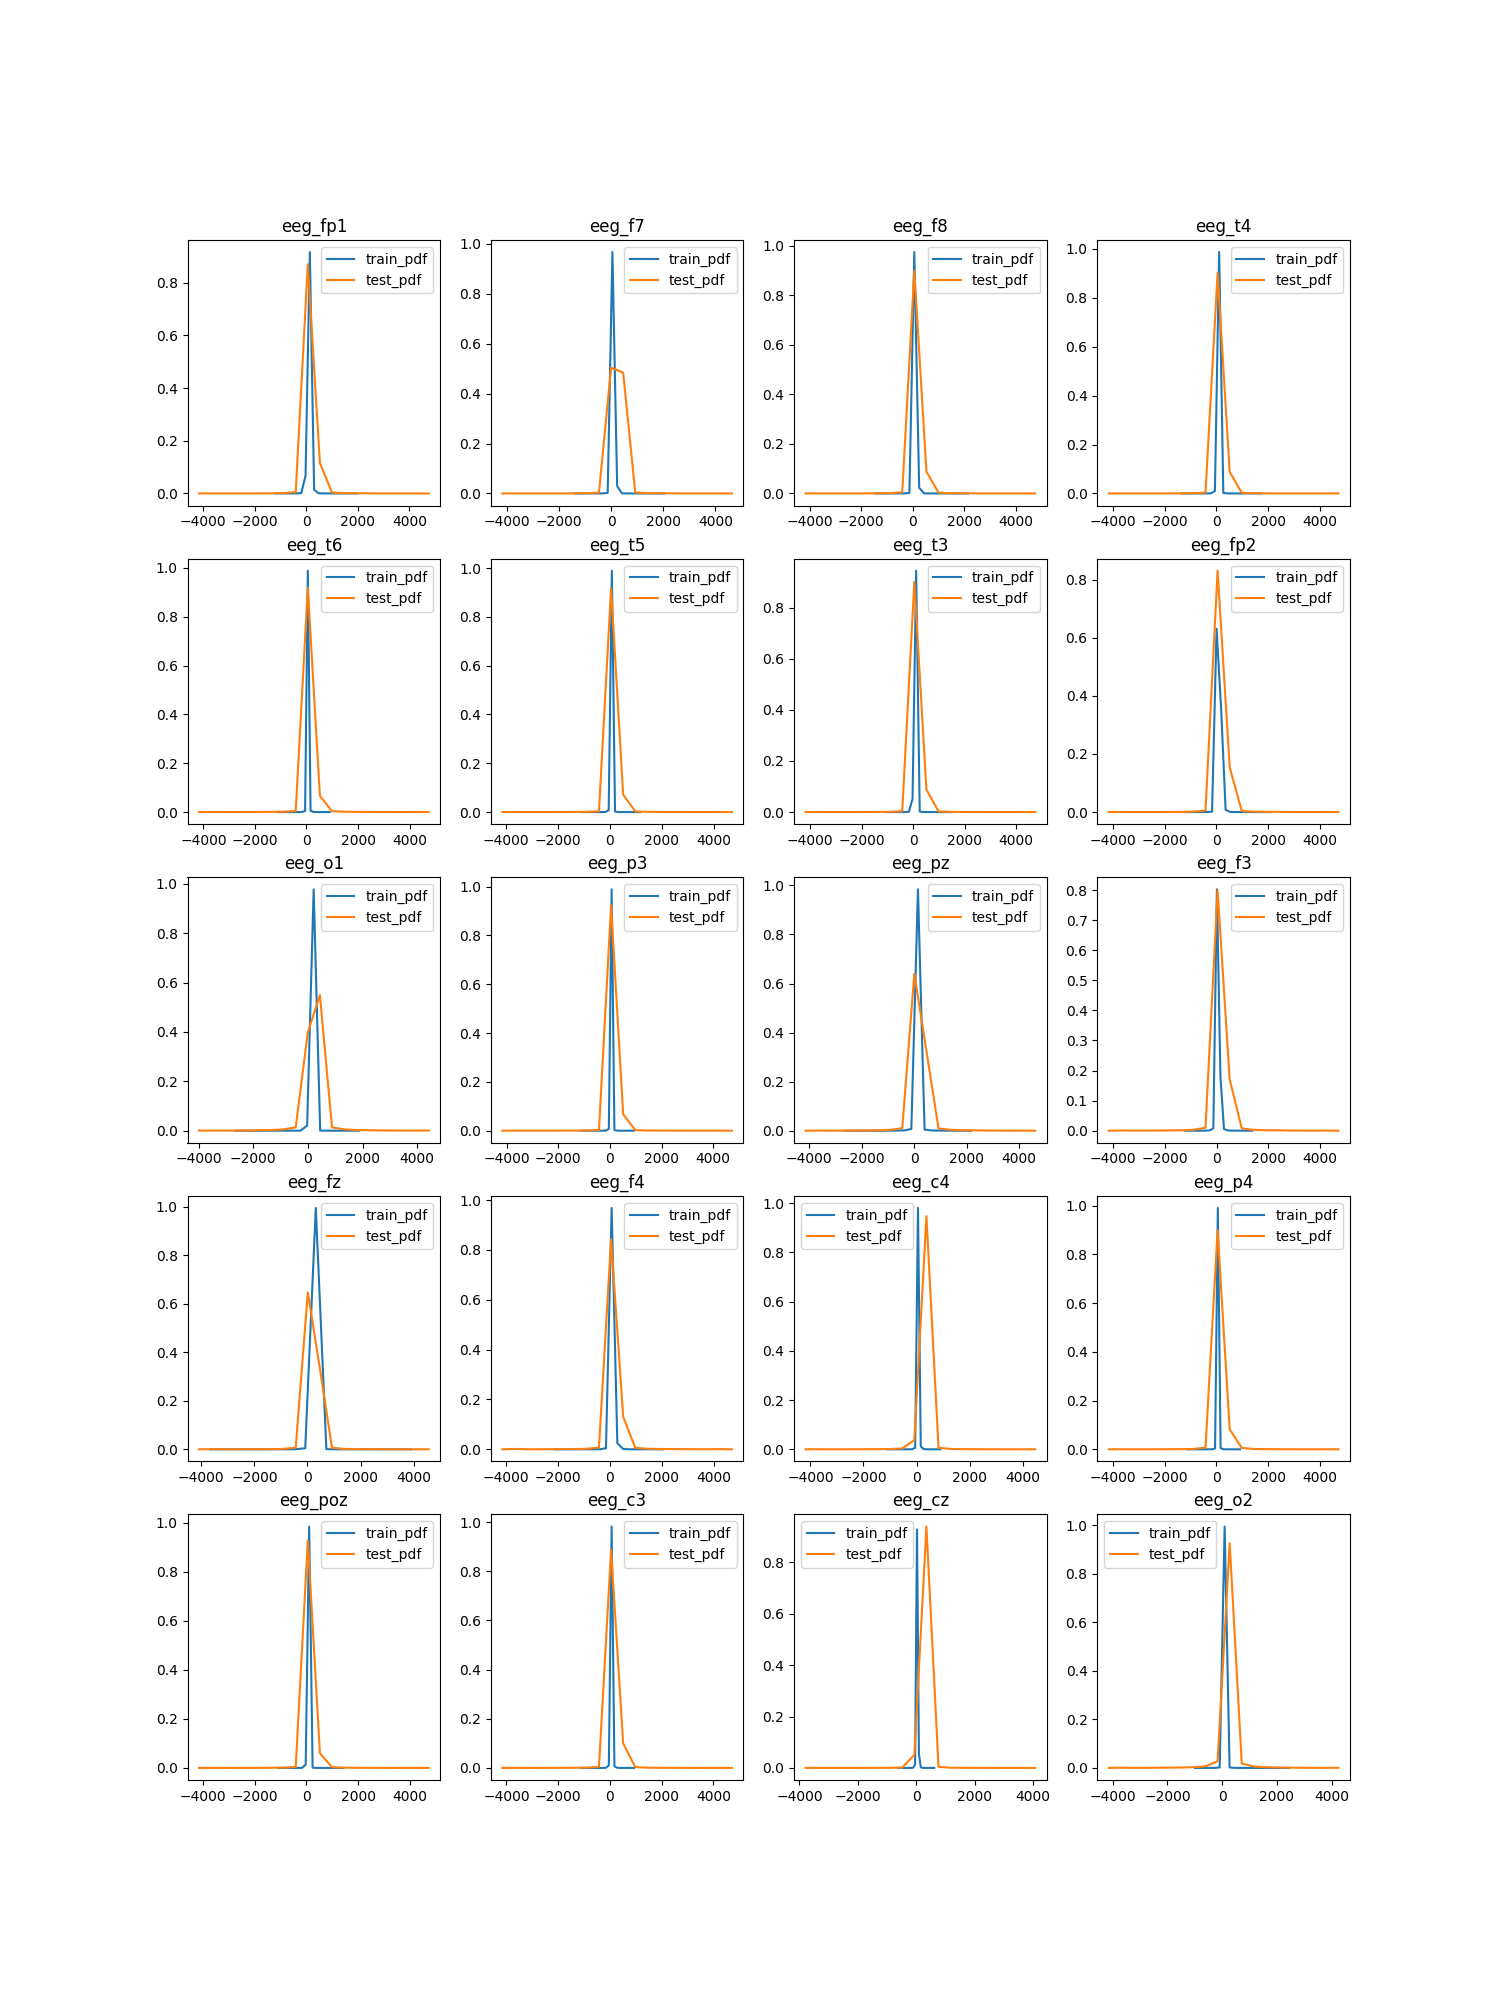

In [32]:
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]

plt.figure(figsize=(15,20))
i = 0

for egg in eeg_features:
    i += 1
    plt.subplot(5, 4, i)

    counts, bin_edges = np.histogram(train[egg], bins=20, density = True)
    pdf = counts/(sum(counts))
    plt.plot(bin_edges[1:],pdf)
    
    counts_1, bin_edges_1 = np.histogram(test[egg], bins=20, density = True)
    pdf_1 = counts_1/(sum(counts_1))
    plt.plot(bin_edges_1[1:],pdf_1)

    plt.title(egg)
    plt.legend(['train_pdf', 'test_pdf'])
plt.show()


We can observe that data is looking like normally distributed. Distributions of both train and test look like centered at 0.
Variance is more on the test dataset, as we see spread is more for all of the test dataset features' pdf than the train dataset features' pdf.
 
 

<IPython.core.display.Javascript object>


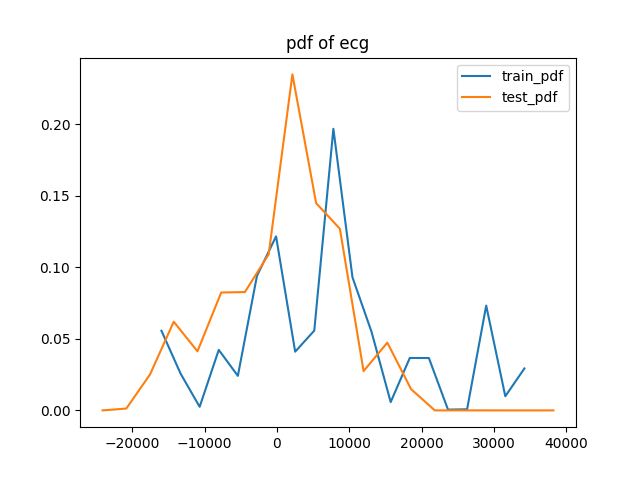

In [38]:
counts, bin_edges = np.histogram(train['ecg'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

counts_1, bin_edges_1 = np.histogram(test['ecg'], bins=20, density = True)
pdf_1 = counts_1/(sum(counts_1))
plt.plot(bin_edges_1[1:],pdf_1)

plt.title('pdf of ecg')
plt.legend(['train_pdf', 'test_pdf'])
plt.show()

We can see that both train and test dist plots looks similar, means having similar kind of distributions. But have too much overlapping between two. Also, from 18000 micro volt only train samples are available. So range of ecg is smaller for test dataset.

<IPython.core.display.Javascript object>


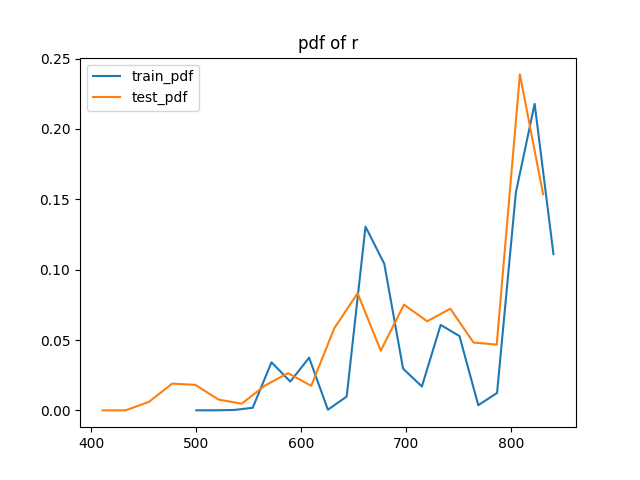

In [39]:
counts, bin_edges = np.histogram(train['r'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

counts_1, bin_edges_1 = np.histogram(test['r'], bins=20, density = True)
pdf_1 = counts_1/(sum(counts_1))
plt.plot(bin_edges_1[1:],pdf_1)

plt.title('pdf of r')
plt.legend(['train_pdf', 'test_pdf'])
plt.show()

We can see that both train and test dist plots looks kind of similar, probably having similar kind of distributions. But have too much overlapping between two. Also, samples are available for lower range of r for test dataset. So range of r is larger for test dataset.

<IPython.core.display.Javascript object>


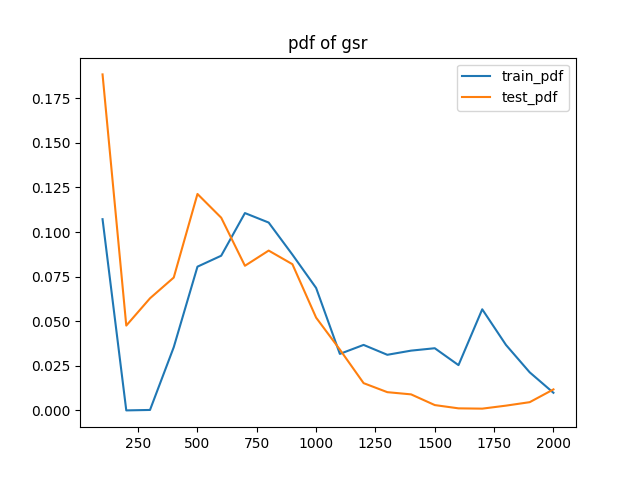

In [40]:
counts, bin_edges = np.histogram(train['gsr'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)

counts_1, bin_edges_1 = np.histogram(test['gsr'], bins=20, density = True)
pdf_1 = counts_1/(sum(counts_1))
plt.plot(bin_edges_1[1:],pdf_1)

plt.title('pdf of gsr')
plt.legend(['train_pdf', 'test_pdf'])
plt.show()

The galvanic skin response (GSR, which falls under the umbrella term of electrodermal activity, or EDA) refers to changes in sweat gland activity that are reflective of the intensity of our emotional state, otherwise known as emotional arousal.

Both train and test dist are very similar, may have similar distributions. Range is also same for train and test dataset.

<IPython.core.display.Javascript object>


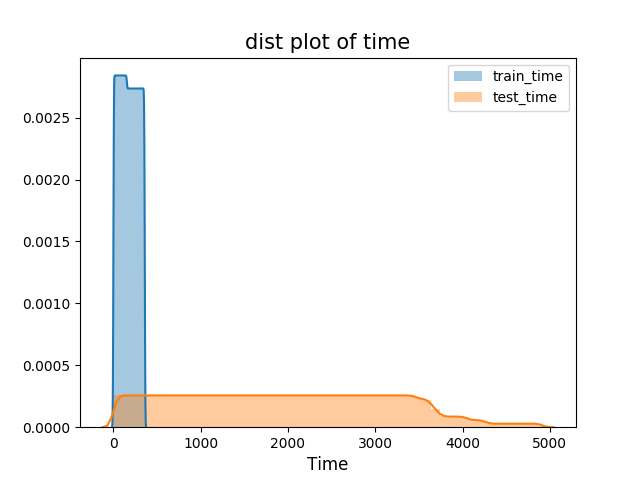

In [41]:
sns.distplot(train['time'])
sns.distplot(test['time'])

plt.legend(['train_time', 'test_time'])
plt.xlabel("Time")
plt.title("dist plot of time")
plt.show()

We can see that, the test time range is much larger than of the train. Means, experiment done on train dataset is in very less time.
Though we can't use time feature as flight simulator time has nothing to do with the experiment time.

### Bivariate analysis

SEAT

0 : left seat

1 : right seat

<IPython.core.display.Javascript object>


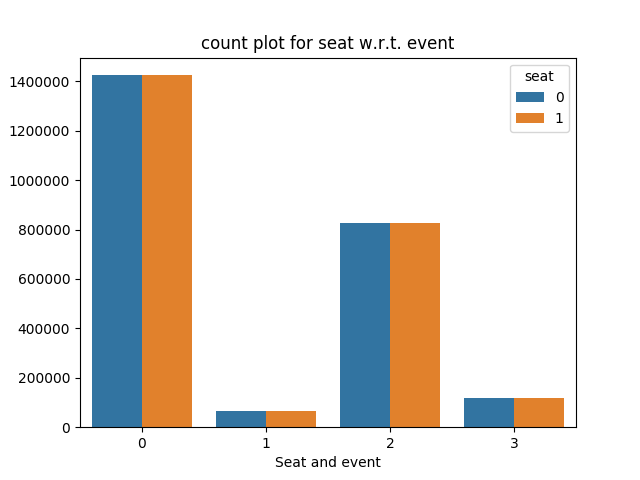

In [51]:
sns.countplot('event', hue='seat', data=train)
plt.xlabel("Seat and event")
plt.ylabel("Count")

plt.title("count plot for seat w.r.t. event")
plt.show()

Seat column may not have any impact on the 'event' outcome, as we can see from the plot, count of seat 0 and seat 1 is the same for each event. We know event 0 occurred max number of times, but we can not tell it's because pilot sitting in seat 0 or 1 because both counts are equal.We will see if this feature is important or not when we see the feature importance graph later.


The simplest bivariate plot is the scatter plot. we need to understand how variables interact with one another. Also scatter plot tells us about the correlation. So we will plot the scatter plots and try to observe it. 

<IPython.core.display.Javascript object>


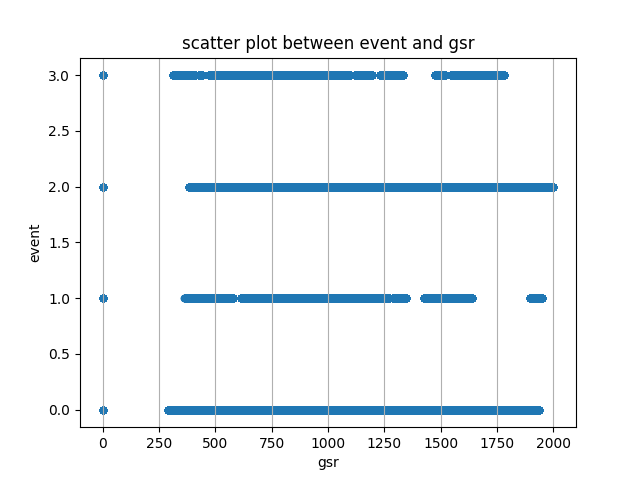

In [24]:
train.plot(x='gsr', y='event', kind='scatter')
plt.title("scatter plot between event and gsr")
plt.show()

We can see that the range of gsr readings for all events is nearly same. Too much overlapping, so we can't conclude anything from this plot. Some gsr readings is zero also, it may be the outlier or wrong data. We will see such cases in feature engineering section. 



<IPython.core.display.Javascript object>


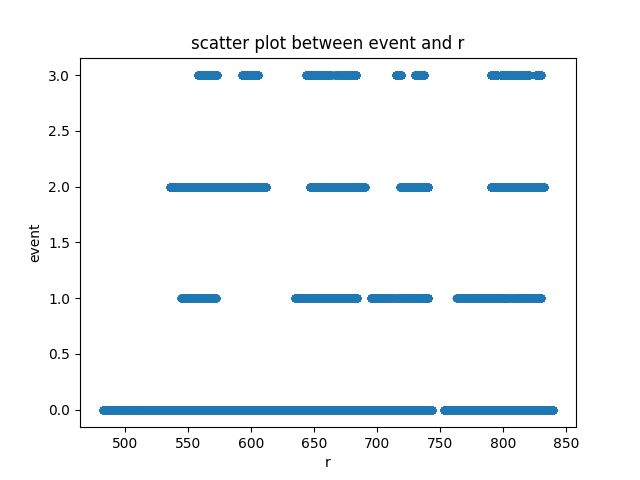

In [25]:
train.plot(x='r', y='event', kind='scatter')
plt.title("scatter plot between event and r")

plt.show()

We can see that the range of r readings for event 0 is the max. If reading is near to 500-525, we can say there are more chances of event 0 occurs.

For other events range is nearly same. Too much overlapping in the range for all events.



<IPython.core.display.Javascript object>


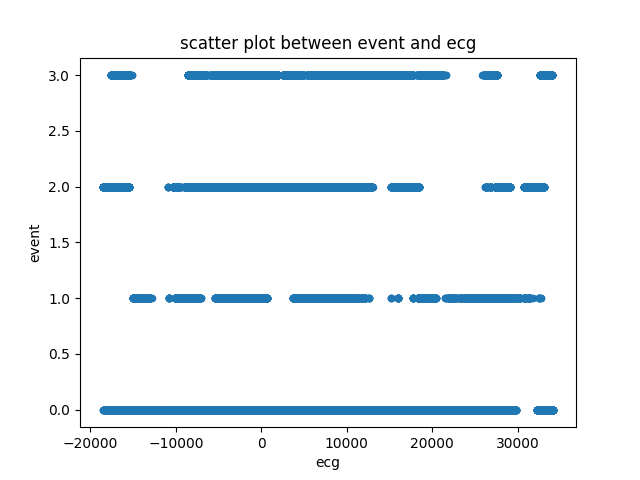

In [26]:
train.plot(x='ecg', y='event', kind='scatter')
plt.title("scatter plot between event and ecg")

plt.show()

There is not much to conclude with this scatter plot. We can see that the range of gsr readings for all events is nearly same. Too much overlapping, so we can't conclude anything from this plot. Some ecg readings is zero also.



<IPython.core.display.Javascript object>


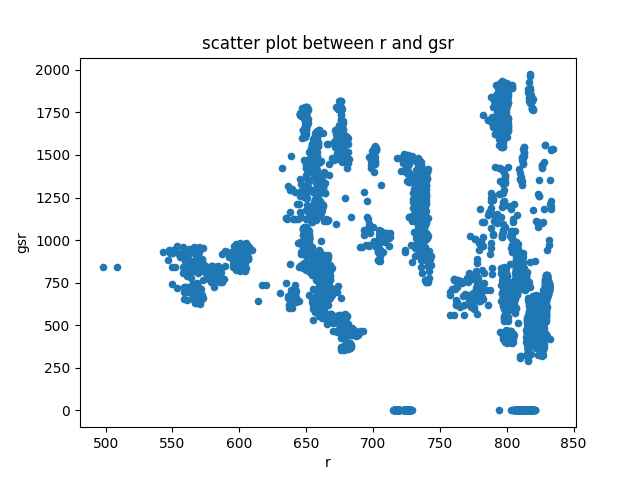

In [27]:
train.sample(5000).plot(x='r', y='gsr', kind='scatter')
plt.title("scatter plot between r and gsr")

plt.show()

It's looking like gsr and r are weakly correlated, but we can not say whether it's positive or negative correlation. As values of r increasing, values of gsr increasing in both positive and negative direction. We have some 0 readings on gsr scale as well. We will see correlation later in this section.

<IPython.core.display.Javascript object>


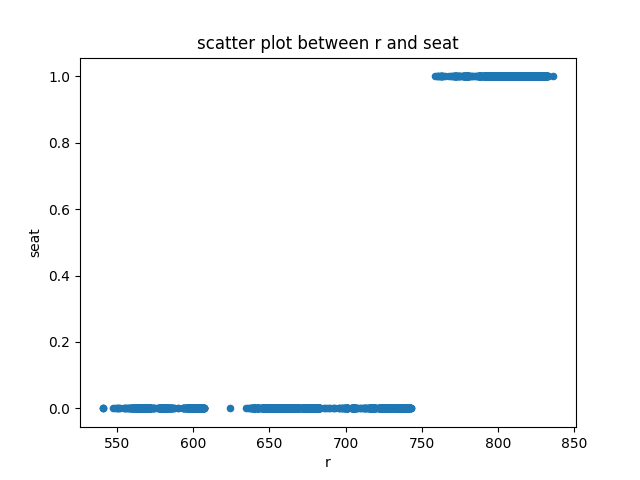

In [28]:
train.sample(5000).plot(x='r', y='seat', kind='scatter')

plt.title("scatter plot between r and seat")

plt.show()

Here we can see, for seat 0 we have values lower than 750 on r-scale. And for seat 1, all values are more than 750 on r-scale. It means 'seat' and 'r' are highly correlated. And it's positive correlation, as value of seat increasing, values of r also increasing. We will see correlation (VIF) later in this section. 

<IPython.core.display.Javascript object>


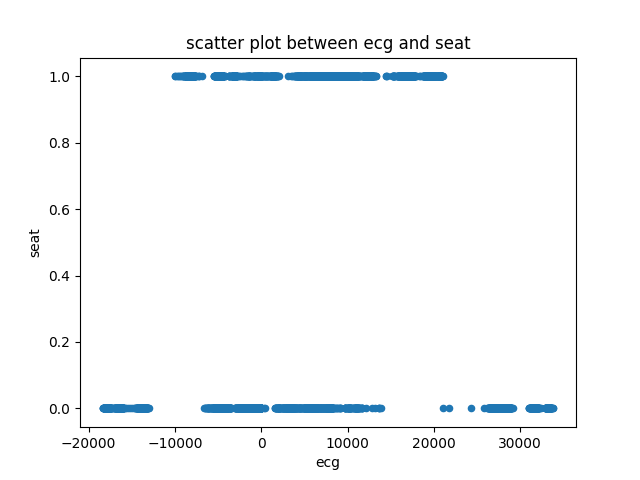

In [29]:
train.sample(5000).plot(x='ecg', y='seat', kind='scatter')
plt.title("scatter plot between ecg and seat")

plt.show()

There is too much overlapping between range of ecg for seat 0 and seat 1. For seat 0 we have higher range, means pilots who were sitting in seat 0 has higher ecg means higher blood pressure.

<IPython.core.display.Javascript object>


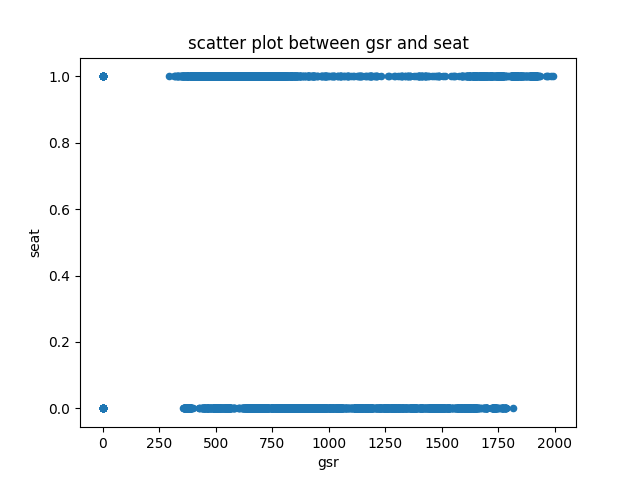

In [30]:
train.sample(5000).plot(x='gsr', y='seat', kind='scatter')
plt.title("scatter plot between gsr and seat")

plt.show()

We can see that the range of gsr readings for seat 0 and seat 1 is nearly same. Too much overlapping, so we can't conclude anything from this plot. Some gsr readings is zero also, it may be the outlier or wrong data. We will see such cases in feature engineering section. 



<IPython.core.display.Javascript object>


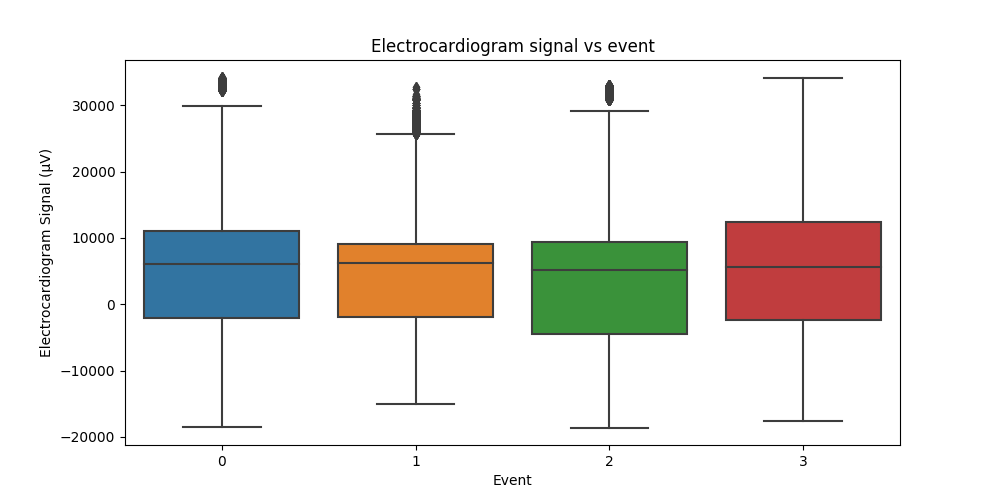

In [53]:
plt.figure(figsize=(10,5))

sns.boxplot(x='event', y='ecg', data=train)
plt.ylabel("Electrocardiogram Signal (µV)")
plt.xlabel("Event")
plt.title("Electrocardiogram signal vs event")
plt.show()



We can observe that, range is least for event 1 and max for event 3. Too much overlapping. We can't differentiate much and not much difference in mean for all the events also. 



<IPython.core.display.Javascript object>


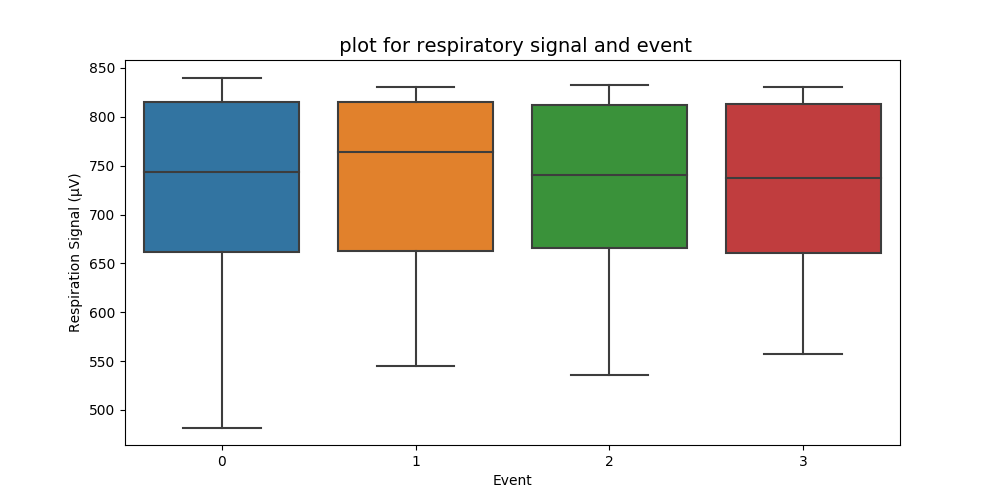

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x='event', y='r', data=train)
plt.ylabel("Respiration Signal (µV)")
plt.xlabel("Event")
plt.title(" plot for respiratory signal and event", fontsize=14)
plt.show()

We can see that not much difference in box plots of all events. Mean is also nealry same for all the events. Event 0, 2 and 3 have nearly the same mean. Event 0 having maximum range. We can say that if r signal values lies between 450-550, event 0 (no event) may occur. 

<IPython.core.display.Javascript object>


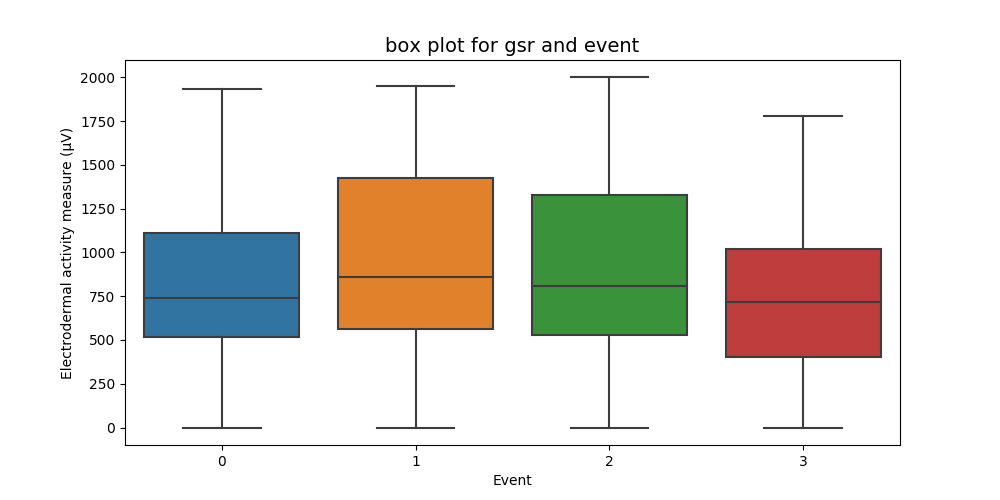

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(x='event', y='gsr', data=train)
plt.ylabel("Electrodermal activity measure (µV)")
plt.xlabel("Event")
plt.title("box plot for gsr and event", fontsize=14)
plt.show()

We can see that not much difference in box plots of all events. Range is almost same for all events and mean too. 
0-1750 (µV) range is common to all the events. We have zero values in gsr readings for all events.

# Feature Engineering



1. Each and every row is the collection of sensor readings of the experiment conducted on each pilot. We have not given pilot data directly. But we can find from crew and seat column.

2. There are 9 unique crews. In each crew there are two pilots, one on the left seat and one on the right seat. So total 18 pilots.

3. The train data is collected from experiments conducted on pilots in different situations. The test data is collected while a flight simulation.

4. Therefore we will not use the 'experiment', 'crew', 'seat' and 'time' features in the model, as they will not be useful for the prediction.

5. The package biosspy returns timestamped values, so we will use cubic interpolation to give values for timestamps in between.

In [16]:
# https://www.kaggle.com/shahaffind/reducing-commercial-aviation-fatalities-11th

from scipy.interpolate import interp1d

def interpolated_value(t, feature_ts, feature_data):
    ''' to predict values that fall within two existing data points using interpolation '''
    new = interp1d(feature_ts, feature_data, kind='cubic', fill_value="extrapolate")
    return new(t)

In [17]:
from biosppy.signals import ecg
from biosppy.signals import resp
from biosppy.signals import eda
from biosppy.signals import eeg

Some sensors have reading 0, i.e., some pilots have missing sensors. we will set those reading to nan, so those will be ignored during learning or predicting.

In [18]:
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3",
                "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]

def pilot_features(data, loca):
    ''' to add new features using biosppy.signals functions'''
    
    temp_df = data.loc[loca][['time', 'ecg', 'r', 'gsr'] + eeg_features].values
    temp_df = temp_df[temp_df[:,0].argsort()]
    
    # if any value is zero for sensors, then replace it with nan. Else create new features like 'heart_rate', 
    # 'resp_rate', 'gsr_amp'
    
    if np.allclose(temp_df[:,1], 0, rtol=1e-10):
        data.loc[loca, 'ecg'] = np.nan
        print('missing egc')
    else:
        try:
            heart_sig = ecg.ecg(signal=temp_df[:,1], sampling_rate=256., show=False)
            heart_rate = heart_sig['heart_rate']
            heart_rate_ts = heart_sig['heart_rate_ts']
            data.loc[loca, 'heart_rate'] = interpolated_value(temp_df[:,0], heart_rate_ts, heart_rate)
        except ValueError:
            print('failed "heart_rate" extraction')
            
    if np.allclose(temp_df[:,2], 0, rtol=1e-10):
        data.loc[loca, 'r'] = np.nan
        print('missing r')
    else:
        try:
            resp_sig = resp.resp(signal=temp_df[:,2], sampling_rate=256., show=False)
            resp_rate = resp_sig['resp_rate']
            resp_rate_ts = resp_sig['resp_rate_ts']
            data.loc[loca, 'resp_rate'] = interpolated_value(temp_df[:,0], resp_rate_ts, resp_rate)
        except ValueError:
            print('failed "resp_rate" extraction')
        
    if np.allclose(temp_df[:,3], 0, rtol=1e-10):
        data.loc[loca, 'gsr'] = np.nan
        print('missing gsr')
    else:
        try:
            gsr_sig = eda.eda(signal=temp_df[:,3], sampling_rate=256., show=False)
            gsr_amp = gsr_sig['amplitudes']
            gsr_amp_ts = temp_df[gsr_sig['onsets'], 0]
            data.loc[loca, 'gsr_amp'] = interpolated_value(temp_df[:,0], gsr_amp_ts, gsr_amp)
        except IndexError:
            print('failed "gsr_amp" extraction')
        except ValueError:
            print('failed "gsr_amp" extraction')
        
    # creating 5 more features with ‘get_power_features’ function which returns 6 values, using interpolation on top of that.
    try:
        eeg_feat_sig = eeg.get_power_features(signal=temp_df[:,4:], sampling_rate=256.)
        eeg_ts = eeg_feat_sig['ts']
        eeg_theta = eeg_feat_sig['theta']
        eeg_alpha_low = eeg_feat_sig['alpha_low']
        eeg_alpha_high = eeg_feat_sig['alpha_high']
        eeg_beta = eeg_feat_sig['beta']
        eeg_gamma = eeg_feat_sig['gamma']
        for i, e in enumerate(eeg_features):
            data.loc[loca, e + '_theta'] = interpolated_value(temp_df[:,0], eeg_ts, eeg_theta[:,i])
            data.loc[loca, e + '_alpha_low'] = interpolated_value(temp_df[:,0], eeg_ts, eeg_alpha_low[:,i])
            data.loc[loca, e + '_alpha_high'] = interpolated_value(temp_df[:,0], eeg_ts, eeg_alpha_high[:,i])
            data.loc[loca, e + '_beta'] = interpolated_value(temp_df[:,0], eeg_ts, eeg_beta[:,i])
            data.loc[loca, e + '_gamma'] = interpolated_value(temp_df[:,0], eeg_ts, eeg_gamma[:,i])
    except ValueError:
        print('failed "eeg"')

In [13]:
new_train_df = train.copy()
new_train_df['heart_rate'] = np.nan
new_train_df['resp_rate'] = np.nan
new_train_df['gsr_amp'] = np.nan

for e in eeg_features:
    new_train_df[e + '_theta'] = np.nan
    new_train_df[e + '_alpha_low'] = np.nan
    new_train_df[e + '_alpha_high'] = np.nan
    new_train_df[e + '_beta'] = np.nan
    new_train_df[e + '_gamma'] = np.nan

for tupl in [(c,s,e) for c in np.unique(new_train_df['crew']) for s in np.unique(new_train_df['seat']) for e in np.unique(new_train_df['experiment'])]:
    c, s, e = tupl
    loca = (new_train_df['crew'] == c) & (new_train_df['seat'] == s) & (new_train_df['experiment'] == e)
    print('extracting for : ', tupl)
    pilot_features(new_train_df, loca)
    
    
print(new_train_df.shape)

extracting for :  (1, 0, 0)
extracting for :  (1, 0, 1)
missing egc
extracting for :  (1, 0, 3)
failed "gsr_amp" extraction
extracting for :  (1, 1, 0)
extracting for :  (1, 1, 1)
extracting for :  (1, 1, 3)
extracting for :  (2, 0, 0)
extracting for :  (2, 0, 1)
extracting for :  (2, 0, 3)
extracting for :  (2, 1, 0)
extracting for :  (2, 1, 1)
missing gsr
extracting for :  (2, 1, 3)
failed "gsr_amp" extraction
extracting for :  (3, 0, 0)
extracting for :  (3, 0, 1)
extracting for :  (3, 0, 3)
extracting for :  (3, 1, 0)
extracting for :  (3, 1, 1)
extracting for :  (3, 1, 3)
extracting for :  (4, 0, 0)
extracting for :  (4, 0, 1)
extracting for :  (4, 0, 3)
extracting for :  (4, 1, 0)
extracting for :  (4, 1, 1)
extracting for :  (4, 1, 3)
extracting for :  (5, 0, 0)
extracting for :  (5, 0, 1)
extracting for :  (5, 0, 3)
extracting for :  (5, 1, 0)
extracting for :  (5, 1, 1)
missing gsr
extracting for :  (5, 1, 3)
extracting for :  (6, 0, 0)
extracting for :  (6, 0, 1)
failed "hear

In [16]:
new_train=new_train_df.drop('experiment',axis=1)
new_train=new_train.drop('time',axis=1)

features=new_train.columns
features

Index(['crew', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6',
       'eeg_t5', 'eeg_t3', 'eeg_fp2',
       ...
       'eeg_cz_theta', 'eeg_cz_alpha_low', 'eeg_cz_alpha_high', 'eeg_cz_beta',
       'eeg_cz_gamma', 'eeg_o2_theta', 'eeg_o2_alpha_low', 'eeg_o2_alpha_high',
       'eeg_o2_beta', 'eeg_o2_gamma'],
      dtype='object', length=129)

In [17]:
# saving new train dataset in csv format

new_train.to_csv('new_train.csv')

In [19]:
# creating different dataset for each pilot 

# adding pilot features same as of train

def test_data_FE(i,list_tup):
    ''' Feature engineering for test dataset '''

    if i==0:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
         
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=10


    elif i==1:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=11
        

    elif i==2:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=20
        

    elif i==3:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=21
        

    elif i==4:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=30
        

    elif i==5:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=31
        

    elif i==6:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=40
        

    elif i==7:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=41
        

    elif i==8:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=50
        

    elif i==9:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=51
        

    elif i==10:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=60
        

    elif i==11:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=61
        

    elif i==12:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=70
        

    elif i==13:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=71
        

    elif i==14:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=80
        

    elif i==15:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=81
        

    elif i==16:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=130
        

    elif i==17:
        temp_df=test[(test['crew']==list_tup[i][0]) & (test['seat']==list_tup[i][1])]
        
        temp_df['heart_rate'] = np.nan
        temp_df['resp_rate'] = np.nan
        temp_df['gsr_amp'] = np.nan
        for e in eeg_features:
            temp_df[e + '_theta'] = np.nan
            temp_df[e + '_alpha_low'] = np.nan
            temp_df[e + '_alpha_high'] = np.nan
            temp_df[e + '_beta'] = np.nan
            temp_df[e + '_gamma'] = np.nan
        pilot_features(temp_df, temp_df.index.values)
        temp_df['pilot']=131
        

    test_id=temp_df['id']
    temp_df=temp_df.drop(['id','crew','experiment','time','seat'],axis=1)

    return temp_df,test_id


In [3]:
def read_new_train_data():
    ''' reading the new created train dataset '''
    
    new_train=pd.read_csv('new_train.csv')
    new_train=memory_opt(new_train)
    new_train=new_train.drop('Unnamed: 0',axis=1)
    
    # dropping the rows with nan values as it will not going to help in model
    new_train=new_train.dropna()
    
    # resetting the index
    new_train.reset_index(inplace = True) 
    
    new_train=new_train.drop('crew',axis=1)
    new_train=new_train.drop('seat',axis=1)
    new_train=new_train.drop('index',axis=1)
    
    return new_train

    

In [8]:

# creating pilot column for train dataset
new_train=read_new_train_data()
pilot=[]
for i in range(len(new_train)):
    pilot.append(new_train['crew'][i]*10+new_train['seat'][i])
    
print(set(pilot))
len(pilot)

pil=pd.DataFrame(pilot,columns=['pilot'])
pil.to_csv('train_pilot.csv')

{130, 131, 70, 71, 40, 41, 10, 11, 80, 81, 50, 51, 20, 21, 60, 61, 30, 31}


4182820

In [4]:
# final train dataset

new_train=read_new_train_data()
pilot=pd.read_csv('train_pilot.csv')
new_train['pilot']=pilot['pilot']

new_train.head()

 Initial Memory of the dataframe is 4827.61 
after optimization, Memory is: 2372.03 
Reduced by 50.9%


eeg_fp1     eeg_f7   eeg_f8     eeg_t4     eeg_t6     eeg_t5     eeg_t3  \
0   -5.285  26.780001  -9.5200 -12.800000  16.719999  33.750000  23.719999   
1   -2.428  28.440001  -9.3200  -3.758000  15.970000  30.440001  21.020000   
2   10.670  30.420000  15.3500  24.719999  16.139999  32.160000  25.440001   
3   11.450  25.610001   2.4340  12.414000  20.530001  31.500000  19.139999   
4    7.285  25.940001   0.1136   5.746000  19.830000  28.750000  20.580000   

   eeg_fp2     eeg_o1     eeg_p3  ...  eeg_cz_alpha_low  eeg_cz_alpha_high  \
0  -6.6950  29.230000  24.840000  ...          0.012816           0.008017   
1  -6.4770  26.639999  24.139999  ...          0.015376           0.009651   
2  -0.0887  28.120001  26.889999  ...          0.017788           0.011192   
3  -0.2566  30.660000  24.250000  ...          0.020054           0.012642   
4  -1.9530  31.719999  25.160000  ...          0.022180           0.014002   

   eeg_cz_beta  eeg_cz_gamma  eeg_o2_theta  eeg_o2_alpha_low  \
0     0.004099      0.003308      0.057064          0.017931   
1     0.004266      0.003284      0.060827          0.018764   
2     0.004427      0.003263      0.064227          0.019555   
3     0.004582      0.003244      0.067277          0.020306   
4     0.004732      0.003228      0.069989          0.021018   

   eeg_o2_alpha_high  eeg_o2_beta  eeg_o2_gamma  pilot  
0           0.021023     0.004697      0.009259     11  
1           0.022093     0.005071      0.009274     11  
2           0.023121     0.005428      0.009289     11  
3           0.024107     0.005767      0.009304     11  
4           0.025054     0.006090      0.009317     11  

[5 rows x 128 columns]

## Correlation or multi-colinearity or feature selection

Here we are using 3 techniques:

1. Variance inflation factor
2. Permutation Importance
3. Recursive feature Importance

Then we can take features from any of the three techniques.

### Variance inflation factor (VIF)

In [45]:
# taking sample from train dataset

df=new_train.sample(60000).copy()
df=df.drop('event',axis=1)
df.head()

eeg_fp1     eeg_f7  eeg_f8  eeg_t4  eeg_t6  eeg_t5  eeg_t3  eeg_fp2  \
2558322  -0.3145  -2.758000  0.0533 -4.8120 -7.5820  23.330   5.965    6.370   
3333606 -26.2300 -16.860001 -8.4800 -8.8400 -8.0300  -6.246  -3.098  -24.660   
2462164  -0.5244  -0.158400  5.3120  3.5100  0.1854  -7.727  -4.780   11.160   
1355480   5.2500   5.330000 -1.4810  0.8716  4.6800  10.300   2.700    3.754   
2820307   2.5140   8.870000 -0.9280  2.1840 -3.6560  -2.982  -0.128   -2.559   

            eeg_o1  eeg_p3  ...  eeg_cz_alpha_low  eeg_cz_alpha_high  \
2558322   2.790000  0.8853  ...          0.045752           0.033480   
3333606  -5.350000 -3.2700  ...          0.008493           0.009457   
2462164  -0.569300 -6.5300  ...          0.020572           0.021860   
1355480  28.799999  8.0300  ...          0.007739           0.009416   
2820307  -0.658700 -2.4430  ...          0.007391           0.010007   

         eeg_cz_beta  eeg_cz_gamma  eeg_o2_theta  eeg_o2_alpha_low  \
2558322     0.015281      0.006024      0.012218          0.025798   
3333606     0.009491      0.003736      0.007864          0.003673   
2462164     0.002940      0.002766      0.001548          0.002540   
1355480     0.007216      0.004481      0.016614          0.006725   
2820307     0.007764      0.003542      0.020768          0.003213   

         eeg_o2_alpha_high  eeg_o2_beta  eeg_o2_gamma  pilot  
2558322           0.021487     0.016318      0.008974     61  
3333606           0.005952     0.005844      0.002610     80  
2462164           0.003516     0.002309      0.003416     61  
1355480           0.008362     0.005596      0.005960     40  
2820307           0.006219     0.003912      0.004026     71  

[5 rows x 127 columns]

From mentioned link, below points:

1. VIF starts at 1 and has no upper limit
2. VIF = 1, no correlation between the independent variable and the other variables
3. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


In [23]:
# https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["var"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif2=vif.sort_values(by=['VIF'], ascending=False)
vif2.reset_index(inplace = True) 

c=0
for i in range(len(vif2['VIF'])):
    if vif2['VIF'][i]>10:
        c=c+1
        print(vif2['var'][i], vif2['VIF'][i])
        
print(c)

eeg_o1_gamma 107.1301841149105
eeg_o1_beta 102.63361484068099
eeg_f8_alpha_high 95.68824964502315
eeg_p3_theta 94.33592367818268
eeg_o1_alpha_high 92.91859170270703
eeg_p4_theta 84.99213866658661
eeg_f8_beta 79.08680934153334
eeg_poz_alpha_high 74.6903149754349
eeg_c3_theta 72.0328978169125
eeg_o1_alpha_low 64.34123397271749
eeg_f7_alpha_high 59.92891825805823
eeg_fp2_alpha_high 56.57555055991812
eeg_poz_theta 52.02979122717033
eeg_t4_alpha_high 51.60083073368754
eeg_f7_alpha_low 47.03619139238127
eeg_t4_alpha_low 42.49819206002418
eeg_c4_theta 39.307740217048696
eeg_p3_alpha_low 37.77953845041639
eeg_fp1_alpha_high 36.07051833392366
eeg_poz_beta 34.75391938057621
eeg_poz_gamma 34.63431542018194
eeg_p4_alpha_low 34.3504968854365
eeg_f4_alpha_high 31.40701437266916
eeg_t4_beta 30.163996140579368
eeg_p3_alpha_high 28.239913701038144
r 27.052177830268505
eeg_poz_alpha_low 26.84833986823889
eeg_f7_gamma 26.5276681981512
eeg_f7_beta 25.933657922021442
eeg_fp2_alpha_low 25.894675399530144
ee

Here we are getting very high values of VIF for some features. So we can take threshold above which we'll remove those features. Let's take threshold as 50 and remove features one by one, which have VIF above 50.

In [13]:
# removing 'eeg_o1_gamma' feature

df=df.drop('eeg_o1_gamma',axis=1)

vif = pd.DataFrame()
vif["var"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif2=vif.sort_values(by=['VIF'], ascending=False)
vif2.reset_index(inplace = True) 

c=0
for i in range(len(vif2['VIF'])):
    if vif2['VIF'][i]>10:
        c=c+1
        print(vif2['var'][i], vif2['VIF'][i])
        
print(c)

eeg_o1_alpha_high 136.30814866185835
eeg_poz_alpha_low 96.27957559744205
eeg_poz_alpha_high 85.68406223864436
eeg_o1_alpha_low 79.21543885579506
eeg_f4_alpha_high 78.70921565359774
eeg_f8_alpha_high 71.12613056790958
eeg_fp1_alpha_high 66.60442217520279
eeg_p3_theta 59.468250192070336
eeg_o1_beta 57.73168014327941
eeg_f7_alpha_high 44.06739873845697
eeg_c3_theta 42.14757946704013
eeg_p3_alpha_low 38.92178662566146
eeg_poz_gamma 37.067837230380526
eeg_p4_alpha_low 36.92548014289338
eeg_p4_theta 36.794037165029074
eeg_f4_alpha_low 35.55799994973639
eeg_poz_beta 35.31593739085859
eeg_fp2_alpha_high 34.60882861758942
eeg_f8_alpha_low 34.26478942135775
eeg_p3_beta 29.627843332427556
eeg_fp1_beta 29.0393714798182
eeg_p4_alpha_high 28.901745614260708
eeg_f8_beta 28.632495129853673
eeg_fp1_alpha_low 28.488273379758585
eeg_p3_alpha_high 27.537558180389993
r 27.08497686873728
eeg_fp1_gamma 25.484179096450813
eeg_poz_theta 25.351529983618832
eeg_o2_gamma 23.94125948396026
eeg_p4_beta 23.828270783

In [15]:
# removing 'eeg_o1_alpha_high' feature

df=df.drop('eeg_o1_alpha_high',axis=1)

vif = pd.DataFrame()
vif["var"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif2=vif.sort_values(by=['VIF'], ascending=False)
vif2.reset_index(inplace = True) 

c=0
for i in range(len(vif2['VIF'])):
    if vif2['VIF'][i]>10:
        c=c+1
        print(vif2['var'][i], vif2['VIF'][i])
        
print(c)

eeg_poz_alpha_low 96.27872896634054
eeg_poz_alpha_high 85.65597924690185
eeg_f4_alpha_high 78.56065596553296
eeg_f8_alpha_high 71.09123413651251
eeg_fp1_alpha_high 66.59886726133101
eeg_p3_theta 59.46809423472039
eeg_f7_alpha_high 44.0659074949429
eeg_c3_theta 42.1449425169879
eeg_p3_alpha_low 38.89891831725248
eeg_poz_gamma 37.05699614792764
eeg_p4_alpha_low 36.925462139229936
eeg_p4_theta 36.79135531236101
eeg_f4_alpha_low 35.53986159962848
eeg_poz_beta 35.31588887236004
eeg_fp2_alpha_high 34.60358177553107
eeg_f8_alpha_low 34.24555399492418
eeg_o1_alpha_low 33.583276351284496
eeg_o1_beta 32.88470870973811
eeg_p3_beta 29.608006732164217
eeg_fp1_beta 29.021491988019697
eeg_p4_alpha_high 28.89982214763633
eeg_f8_beta 28.61898475025524
eeg_fp1_alpha_low 28.488060209454225
eeg_p3_alpha_high 27.528229371586356
r 27.079470612772614
eeg_fp1_gamma 25.4785239943227
eeg_poz_theta 25.338402104153356
eeg_o2_gamma 23.93451404753896
eeg_p4_beta 23.813276650045314
eeg_c4_theta 23.364971980034703
ee

In [16]:
# removing 'eeg_poz_alpha_low' feature

df=df.drop('eeg_poz_alpha_low',axis=1)
vif = pd.DataFrame()
vif["var"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif2=vif.sort_values(by=['VIF'], ascending=False)
vif2.reset_index(inplace = True) 

c=0
for i in range(len(vif2['VIF'])):
    if vif2['VIF'][i]>10:
        c=c+1
        print(vif2['var'][i], vif2['VIF'][i])
        
print(c)

eeg_f4_alpha_high 78.52947959585119
eeg_f8_alpha_high 71.08355045969736
eeg_fp1_alpha_high 66.52551541697667
eeg_p3_theta 58.93387494841991
eeg_f7_alpha_high 44.03098611235095
eeg_c3_theta 41.83986790850303
eeg_p3_alpha_low 37.283512518873756
eeg_poz_gamma 36.66525855543313
eeg_f4_alpha_low 35.53649769962123
eeg_poz_beta 34.74953462241956
eeg_fp2_alpha_high 34.379656546623345
eeg_p4_alpha_low 34.240828024520155
eeg_f8_alpha_low 34.18211780546573
eeg_o1_alpha_low 33.53891633073421
eeg_p4_theta 32.95825778983023
eeg_o1_beta 32.8116242926766
eeg_p3_beta 29.472164930871507
eeg_fp1_beta 29.01633381465497
eeg_f8_beta 28.596544491707526
eeg_fp1_alpha_low 28.437263990580334
eeg_p4_alpha_high 27.29269967980906
r 27.06496102995794
eeg_p3_alpha_high 26.631663339206863
eeg_fp1_gamma 25.476308210514375
eeg_p4_beta 23.683708967543303
eeg_c4_theta 23.33951590319699
eeg_o2_gamma 22.629041587422385
eeg_c3_alpha_low 22.12130441250354
eeg_poz_theta 21.792965734898907
eeg_cz_gamma 21.6197271421448
resp_ra

In [17]:
# removing 'eeg_f4_alpha_high' feature
 
df=df.drop('eeg_f4_alpha_high',axis=1)
vif = pd.DataFrame()
vif["var"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif2=vif.sort_values(by=['VIF'], ascending=False)
vif2.reset_index(inplace = True) 

c=0
for i in range(len(vif2['VIF'])):
    if vif2['VIF'][i]>10:
        c=c+1
        print(vif2['var'][i], vif2['VIF'][i])
        
print(c)

eeg_f8_alpha_high 71.08332167947677
eeg_fp1_alpha_high 66.06990615495414
eeg_p3_theta 58.93346234640915
eeg_f7_alpha_high 44.02996481658753
eeg_c3_theta 41.829454506108696
eeg_p3_alpha_low 37.265893735390385
eeg_poz_gamma 36.61704531226379
eeg_poz_beta 34.734757024019125
eeg_p4_alpha_low 34.23190476568021
eeg_f8_alpha_low 34.18132220732475
eeg_fp2_alpha_high 33.80193110828638
eeg_o1_alpha_low 33.53838038645149
eeg_p4_theta 32.85237950162344
eeg_o1_beta 32.80886714580636
eeg_p3_beta 29.457378601201647
eeg_fp1_beta 28.95070498850506
eeg_f8_beta 28.59363033926226
eeg_fp1_alpha_low 28.239913978754352
eeg_p4_alpha_high 27.267894436246763
r 27.064381281128927
eeg_p3_alpha_high 26.614632077569272
eeg_fp1_gamma 25.475817181536144
eeg_p4_beta 23.66564308371562
eeg_c4_theta 23.32313149889845
eeg_o2_gamma 22.61540587677017
eeg_c3_alpha_low 22.098054928063807
eeg_poz_theta 21.776363637411603
eeg_cz_gamma 21.571023908436505
resp_rate 20.62962395849889
eeg_f4_alpha_low 20.317839717648052
eeg_f7_beta

In [18]:
# removing 'eeg_f8_alpha_high' feature

df=df.drop('eeg_f8_alpha_high',axis=1)
vif = pd.DataFrame()
vif["var"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif2=vif.sort_values(by=['VIF'], ascending=False)
vif2.reset_index(inplace = True) 

c=0
for i in range(len(vif2['VIF'])):
    if vif2['VIF'][i]>10:
        c=c+1
        print(vif2['var'][i], vif2['VIF'][i])
        
print(c)

eeg_fp1_alpha_high 66.06291558961509
eeg_p3_theta 58.91529739771062
eeg_f7_alpha_high 42.635028971591254
eeg_c3_theta 41.8253019134098
eeg_p3_alpha_low 37.25498814989989
eeg_poz_gamma 36.5593914129057
eeg_poz_beta 34.72537576465631
eeg_p4_alpha_low 34.22689001022839
eeg_o1_alpha_low 33.41434336584341
eeg_p4_theta 32.85126539959785
eeg_o1_beta 32.64456837750116
eeg_p3_beta 29.407176425145366
eeg_fp1_beta 28.602009739635765
eeg_fp2_alpha_high 28.355264950964433
eeg_fp1_alpha_low 28.043689928267383
eeg_p4_alpha_high 27.24004239900636
r 27.063856933762647
eeg_p3_alpha_high 26.613921093953326
eeg_fp1_gamma 25.475149200854606
eeg_p4_beta 23.652036281849423
eeg_c4_theta 23.290618385492596
eeg_o2_gamma 22.60723728210911
eeg_c3_alpha_low 22.097577492175382
eeg_poz_theta 21.74357421917015
eeg_cz_gamma 21.421323051265272
resp_rate 20.628333431854646
eeg_f4_alpha_low 20.313327072935056
eeg_f7_beta 20.212891264750855
eeg_f7_alpha_low 19.880980607493942
eeg_cz_alpha_high 19.75724991134821
eeg_o2_bet

In [19]:
# removing 'eeg_fp1_alpha_high' feature

df=df.drop('eeg_fp1_alpha_high',axis=1)
vif = pd.DataFrame()
vif["var"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif2=vif.sort_values(by=['VIF'], ascending=False)
vif2.reset_index(inplace = True) 

c=0
for i in range(len(vif2['VIF'])):
    if vif2['VIF'][i]>10:
        c=c+1
        print(vif2['var'][i], vif2['VIF'][i])
        
print(c)

eeg_p3_theta 58.914891651030715
eeg_f7_alpha_high 42.13274078785371
eeg_c3_theta 41.82529422861325
eeg_p3_alpha_low 36.922602805611625
eeg_poz_gamma 36.45574693035603
eeg_poz_beta 34.67933227762848
eeg_p4_alpha_low 34.22289196979079
eeg_o1_alpha_low 33.397017909999974
eeg_p4_theta 32.72744112846342
eeg_o1_beta 32.642664320436324
eeg_p3_beta 29.37494374334942
r 27.063839248980187
eeg_p4_alpha_high 27.003073571995937
eeg_p3_alpha_high 26.606953145180956
eeg_fp1_gamma 24.9207386129968
eeg_p4_beta 23.41387746276144
eeg_c4_theta 23.16758735904565
eeg_o2_gamma 22.602483044911192
eeg_c3_alpha_low 22.037090699965617
eeg_poz_theta 21.596661238758387
eeg_cz_gamma 21.06416647562665
resp_rate 20.62532070729276
eeg_f4_alpha_low 20.291454432917405
eeg_f7_beta 20.121656956334924
eeg_fp1_beta 20.006243575833267
eeg_f7_alpha_low 19.823873385015194
eeg_cz_alpha_high 19.55553873806741
eeg_o2_beta 19.554990283789685
eeg_t3_alpha_high 19.069382220109983
eeg_t5_alpha_high 18.6094902603006
eeg_t5_alpha_low 1

In [20]:
# removing 'eeg_p3_theta' feature

df=df.drop('eeg_p3_theta',axis=1)
vif = pd.DataFrame()
vif["var"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif2=vif.sort_values(by=['VIF'], ascending=False)
vif2.reset_index(inplace = True) 

c=0
for i in range(len(vif2['VIF'])):
    if vif2['VIF'][i]>10:
        c=c+1
        print(vif2['var'][i], vif2['VIF'][i])
        
print(c)

eeg_f7_alpha_high 41.63644816855291
eeg_poz_gamma 36.43954194559523
eeg_p3_alpha_low 36.14246576215898
eeg_poz_beta 34.616169623553766
eeg_p4_alpha_low 33.754905302853956
eeg_o1_alpha_low 33.393651861963626
eeg_o1_beta 32.6425799728356
eeg_p3_beta 29.129694503110628
eeg_p4_theta 28.66985977110551
r 27.0478915808393
eeg_p4_alpha_high 27.001995356396918
eeg_p3_alpha_high 26.178561004235604
eeg_fp1_gamma 24.502761935928117
eeg_p4_beta 23.407107677411975
eeg_c4_theta 23.161345848391274
eeg_c3_theta 22.90849325116147
eeg_o2_gamma 22.583789125437544
eeg_c3_alpha_low 21.370070338522105
eeg_cz_gamma 21.058097859954753
resp_rate 20.60038013620279
eeg_f4_alpha_low 20.291448187873286
eeg_f7_beta 20.076663393899235
eeg_fp1_beta 19.861704969760687
eeg_f7_alpha_low 19.696710030866523
eeg_cz_alpha_high 19.552703838156397
eeg_o2_beta 19.547079995714675
eeg_t3_alpha_high 19.00874891982403
eeg_t5_alpha_high 18.53304668312037
eeg_t5_alpha_low 17.982997197440078
eeg_c3_alpha_high 16.80898738639548
eeg_fp2

Now all features having VIF less than 50. We'll save these features, in case we are going to use these for our model.

In [25]:
import pickle

VIF_col=df.columns.to_list()
with open("VIF_col.txt", "wb") as f:   
    pickle.dump(VIF_col, f)

### Permutation Importance

In [15]:
y_t=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train.shape

(4182820, 127)

In [17]:
# https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#eli5.sklearn.permutation_importance.PermutationImportance
# https://www.kaggle.com/dansbecker/permutation-importance

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(new_train, y_t, random_state=1)
mod = DecisionTreeClassifier(random_state=0).fit(train_X, train_y)

perm = PermutationImportance(mod, random_state=1).fit(val_X, val_y)
t=eli5.show_weights(perm, feature_names = val_X.columns.tolist())
t

In [31]:
# creating dataframe with features and their corresponding weight which we calculated from permutation importance features

fea=val_X.columns.tolist()
val=perm.feature_importances_
PermImp_df=pd.DataFrame(fea,columns=['feature'])
PermImp_df['weight']=val

PermImp_df=PermImp_df.sort_values(by=['weight'], ascending=False)
PermImp_df.reset_index(inplace = True) 
PermImp_df=PermImp_df.drop('index',axis=1)
PermImp_df

feature   weight
0                   r  0.20144
1                 ecg  0.20008
2                 gsr  0.13984
3               pilot  0.09060
4        eeg_f7_gamma  0.08400
..                ...      ...
122      eeg_t4_theta -0.00008
123       eeg_c4_beta -0.00008
124            eeg_pz -0.00012
125      eeg_fz_theta -0.00076
126  eeg_cz_alpha_low -0.00128

[127 rows x 2 columns]

In [33]:
c=0
for i in PermImp_df['weight']:
    if i>0:
        c=c+1
        
c        

120

In [37]:
PermImp_df.to_csv('PermImp_df.csv')

In [28]:
p=pd.read_csv('PermImp_df.csv')
p=p.drop('Unnamed: 0',axis=1)
p

feature   weight
0                   r  0.20144
1                 ecg  0.20008
2                 gsr  0.13984
3               pilot  0.09060
4        eeg_f7_gamma  0.08400
..                ...      ...
122      eeg_t4_theta -0.00008
123       eeg_c4_beta -0.00008
124            eeg_pz -0.00012
125      eeg_fz_theta -0.00076
126  eeg_cz_alpha_low -0.00128

[127 rows x 2 columns]

### Recursive Feature Elimination (RFE)

In [9]:
# taking sample of train dataset

df=new_train.sample(30000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df.shape

(30000, 127)

In [10]:
# https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV
from sklearn.linear_model import SGDClassifier

cv = StratifiedKFold(2)

visualizer = RFECV(SGDClassifier(n_jobs=-1), cv=cv, scoring='f1_weighted', n_jobs=-1)
visualizer.fit(df, y)    

RFECV(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa66bb0beb8>,
      cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      groups=None, model=None, scoring='f1_weighted', step=1)

In [12]:
print(visualizer.support_)
visualizer.ranking_

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False  True  True
 False False False  True  True  True False False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  3,  1,  1,  5,  7,  4,
        1,  1,  1,  6,  8,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [23]:
# taking those features which have ranking 1, means are selected in RFECV

fea=list(df.columns)
f=[]
for i in range(len(visualizer.ranking_)):
    if visualizer.ranking_[i] ==1:
        f.append(fea[i])
        
        
len(f)

118

In [25]:
import pickle

RFE_col=f
with open("RFE_col.txt", "wb") as fe:   
    pickle.dump(RFE_col, fe)

Summary and Conclusions :

1. Originally, we had 28 features in the train dataset and 28 features in the test dataset. We have 'event' as the output/dependent variable in the train dataset. 

2. And 'id' feature in test dataset which is not present in the train dataset. We'll use it only for the submission, not in the model prediction.

3. We have huge train and test datasets, so we used a memory optimization function to change the datatypes of columns accordingly (int8, flloat32).

4. From EDA we know most of the features are following gaussian distribution with skewness. But as decision trees/gradient boosting algorithms don't get affected by skewness, we are not going to handle this.

5. We have imbalance data, so we will make this balanced in the next section.

6. 'Experiment' feature has 'CA', 'DA', 'SS' values in train dataset, and 'LOFT' in the test dataset. So we are not going to consider this feature for our model.

7. We have 9 unique crews. And each sitting in either seat 0 or seat 1. So we can have total unique 18 pilots. In the same way, we created a pilot column. And will remove crew and seat features. As we saw in the "count plot for seat w.r.t. event", seat feature is not helping with events.

8. For the "time" feature, we can't use the "time" feature as flight simulator time has nothing to do with the experiment time.

9. Now comes to feature engineering, here we are using biosppy inbuilt functions to create new features from sensor readings. 
refer: "https://biosppy.readthedocs.io/en/stable/biosppy.signals.html#biosppy.signals.eeg.get_power_features". 


10. And if any signal reading is zero we are replacing it with nan. And if not, we will use interpolation for the new feature values, like 'heart_rate', 'resp_rate', 'gsr_amp' (3 new features) and 5 new features for each eeg feature (20*5 = 100 new features) using 'get_power_features' function. 

11. Also created a 'pilot' feature with seat and crew.

12. In this way we created 104 new features and dropping some features like seat, experiment, time, crew.

13. Now after creating all the features, we have to check for correlation. So we have 3 techniques to do that: 
a) VIF (variance inflation factor)
b) permutation importance
c) recursive feature elimination --> rfe


14. Then we checked for correlation by VIF (variance inflation factor), and set the threshold as 50. Features having VIF more than 50, will remove those recursively. And get our final features having VIF less than 50.

15. Now checked with permutaion importance, it will return features with their weights. High weight means important feature.

16. Then checked with rfe, having attribute .ranking_ which gives 1 for the selected features. In this way we can have our important features. When we have highly correlated features, we should go for rfecv.

17. We can take features from any above 3 techniques mentioned and use for the model. 


# Modeling

In [33]:
# imbalance percentage
c_0=0
c_1=0
c_2=0
c_3=0
for i in y:
    if i==0:
        c_0=c_0+1
    elif i==1:
        c_1=c_1+1
    elif i==2:
        c_2=c_2+1
    elif i==3:
        c_3=c_3+1
        
print('0 class percent : ',(c_0/len(y)))
print('1 class percent : ',(c_1/len(y)))
print('2 class percent : ',(c_2/len(y)))
print('3 class percent : ',(c_3/len(y)))

0 class percent :  0.5575085707728279
1 class percent :  0.028466441300366737
2 class percent :  0.37312100448979396
3 class percent :  0.0409039834370114


As we have imbalanced class, we will use 'class_weight' attribute as 'balanced' in the models. Or, we can use weight for each class.

In [5]:
# features which we got after permutation importance

features=pd.read_csv('PermImp_df.csv')

featr=[]
for i in range(len(features)):
    if (features['weight'][i]<=0):
        featr.append(features.iloc[i]['feature'])
        
len(featr)

7

## Random Model

In [6]:
# with full train data

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
new_train.head()

# after dropping 7 columns, finally we have 120 columns

eeg_fp1     eeg_f7   eeg_f8     eeg_t4     eeg_t6     eeg_t5     eeg_t3  \
0   -5.285  26.780001  -9.5200 -12.800000  16.719999  33.750000  23.719999   
1   -2.428  28.440001  -9.3200  -3.758000  15.970000  30.440001  21.020000   
2   10.670  30.420000  15.3500  24.719999  16.139999  32.160000  25.440001   
3   11.450  25.610001   2.4340  12.414000  20.530001  31.500000  19.139999   
4    7.285  25.940001   0.1136   5.746000  19.830000  28.750000  20.580000   

   eeg_fp2     eeg_o1     eeg_p3  ...  eeg_cz_theta  eeg_cz_alpha_high  \
0  -6.6950  29.230000  24.840000  ...      0.264202           0.008017   
1  -6.4770  26.639999  24.139999  ...      0.280113           0.009651   
2  -0.0887  28.120001  26.889999  ...      0.295369           0.011192   
3  -0.2566  30.660000  24.250000  ...      0.309985           0.012642   
4  -1.9530  31.719999  25.160000  ...      0.323974           0.014002   

   eeg_cz_beta  eeg_cz_gamma  eeg_o2_theta  eeg_o2_alpha_low  \
0     0.004099      0.003308      0.057064          0.017931   
1     0.004266      0.003284      0.060827          0.018764   
2     0.004427      0.003263      0.064227          0.019555   
3     0.004582      0.003244      0.067277          0.020306   
4     0.004732      0.003228      0.069989          0.021018   

   eeg_o2_alpha_high  eeg_o2_beta  eeg_o2_gamma  pilot  
0           0.021023     0.004697      0.009259     11  
1           0.022093     0.005071      0.009274     11  
2           0.023121     0.005428      0.009289     11  
3           0.024107     0.005767      0.009304     11  
4           0.025054     0.006090      0.009317     11  

[5 rows x 120 columns]

In [12]:
# train and test split to get train and val data

train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [13]:

y_cv_predict = np.zeros((val_df.shape[0],4))

for i in range(val_df.shape[0]):
    rand_probs = np.random.rand(1,4)
    y_cv_predict[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("CV Data log-loss for Random Model",log_loss(y_val,y_cv_predict, eps=1e-15))


CV Data log-loss for Random Model 1.6455166263817762


## LGB Model

In [11]:
# taking sample

df=new_train.sample(90000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df.shape
df=df.drop(featr,axis=1)
df.head()

# after dropping 7 columns, finally we have 120 columns

eeg_fp1     eeg_f7     eeg_f8     eeg_t4   eeg_t6     eeg_t5  eeg_t3  \
0    2.656  36.380001 -44.279999 -80.800003 -10.1250  60.900002   1.849   
1  -10.945  -0.986000   7.535000   2.648000  11.4900   0.320000  -3.982   
2    1.668   6.350000  -4.580000  -1.198000 -11.0700   4.168000   9.445   
3    8.484 -16.059999 -12.120000   1.365000   0.4553  -0.348600  -8.350   
4    4.410   4.598000   3.700000   8.290000  13.7000   5.760000   3.215   

     eeg_fp2     eeg_o1     eeg_p3  ...  eeg_cz_theta  eeg_cz_alpha_high  \
0  -0.071170  31.469999  31.059999  ...      0.036738           0.013543   
1 -18.969999   4.010000   5.688000  ...      0.088851           0.017391   
2  -0.605000  -3.523000   3.912000  ...      0.032846           0.027974   
3   2.541000  -2.896000  -6.402000  ...      0.008405           0.006233   
4   4.938000  10.336000   0.781700  ...      0.067252           0.008660   

   eeg_cz_beta  eeg_cz_gamma  eeg_o2_theta  eeg_o2_alpha_low  \
0     0.015074      0.007168      0.011739          0.017926   
1     0.010463      0.003081      0.019302          0.012951   
2     0.022040      0.008219      0.034019          0.013455   
3     0.002174      0.003101      0.006215          0.006021   
4     0.011886      0.002416      0.088930          0.002373   

   eeg_o2_alpha_high  eeg_o2_beta  eeg_o2_gamma  pilot  
0           0.025402     0.014329      0.008887    130  
1           0.016894     0.004908      0.001686     71  
2           0.008486     0.007529      0.004383    131  
3           0.002319     0.002867      0.001665     61  
4           0.011607     0.005511      0.004638     31  

[5 rows x 120 columns]

In [12]:
# train and test split to get train and val data

train_df, val_df, y_train, y_val = train_test_split(df, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((72000, 120), (18000, 120), 72000, 18000)

In [55]:
# lightgbm - hyperparameter tuning
# https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db

import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

lg = lgb.LGBMClassifier(objective='multiclass', class_weight ='balanced')
param_dist = {"max_depth" : [10,25,50],"learning_rate" : [0.1, 0.5, 0.6],"n_estimators": [30,100,200]}

grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, verbose=5)
grid_search.fit(train_df, y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  7.9min finished


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.5,
               max_depth=10, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=200, n_jobs=-1, num_leaves=31,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [6]:
# with full train data

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
new_train.head()

eeg_fp1     eeg_f7   eeg_f8     eeg_t4     eeg_t6     eeg_t5     eeg_t3  \
0   -5.285  26.780001  -9.5200 -12.800000  16.719999  33.750000  23.719999   
1   -2.428  28.440001  -9.3200  -3.758000  15.970000  30.440001  21.020000   
2   10.670  30.420000  15.3500  24.719999  16.139999  32.160000  25.440001   
3   11.450  25.610001   2.4340  12.414000  20.530001  31.500000  19.139999   
4    7.285  25.940001   0.1136   5.746000  19.830000  28.750000  20.580000   

   eeg_fp2     eeg_o1     eeg_p3  ...  eeg_cz_theta  eeg_cz_alpha_high  \
0  -6.6950  29.230000  24.840000  ...      0.264202           0.008017   
1  -6.4770  26.639999  24.139999  ...      0.280113           0.009651   
2  -0.0887  28.120001  26.889999  ...      0.295369           0.011192   
3  -0.2566  30.660000  24.250000  ...      0.309985           0.012642   
4  -1.9530  31.719999  25.160000  ...      0.323974           0.014002   

   eeg_cz_beta  eeg_cz_gamma  eeg_o2_theta  eeg_o2_alpha_low  \
0     0.004099      0.003308      0.057064          0.017931   
1     0.004266      0.003284      0.060827          0.018764   
2     0.004427      0.003263      0.064227          0.019555   
3     0.004582      0.003244      0.067277          0.020306   
4     0.004732      0.003228      0.069989          0.021018   

   eeg_o2_alpha_high  eeg_o2_beta  eeg_o2_gamma  pilot  
0           0.021023     0.004697      0.009259     11  
1           0.022093     0.005071      0.009274     11  
2           0.023121     0.005428      0.009289     11  
3           0.024107     0.005767      0.009304     11  
4           0.025054     0.006090      0.009317     11  

[5 rows x 120 columns]

In [7]:
# train and validation dataset

train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [25]:
# tuning n_estimators

d_train = lgb.Dataset(train_df, label=y_train)

for i in [50, 100, 200]:
    params={'class_weight':'balanced', 'learning_rate':0.5, 'max_depth':10, 'objective':'multiclass','num_class':4,'metric': 'multi_logloss', 'n_estimators':i}
    model2 = lgb.train(params, d_train)
    y_predict=model2.predict(train_df)
    print('TRAIN LOSS is ',log_loss(y_train, y_predict),i)
    y_predict=model2.predict(val_df)
    print('CV LOSS is ',log_loss(y_val, y_predict),i)


TRAIN LOSS is  0.046452663938260655 50
CV LOSS is  0.04811346513573304 50
TRAIN LOSS is  0.04548461693615258 100
CV LOSS is  0.04999708108552035 100
TRAIN LOSS is  0.12127052650222386 200
CV LOSS is  0.13018845890431907 200


In [14]:
d_train = lgb.Dataset(train_df, label=y_train)
params={'class_weight':'balanced', 'learning_rate':0.5, 'max_depth':10,
        'n_estimators':50, 'objective':'multiclass','num_class':4,'metric': 'multi_logloss'}

model2 = lgb.train(params, d_train)

y_predict=model2.predict(train_df)
print('TRAIN LOSS is ',log_loss(y_train, y_predict))
y_predict=model2.predict(val_df)
print('CV LOSS is ',log_loss(y_val, y_predict))


TRAIN LOSS is  0.04645266393826068
CV LOSS is  0.04811346513573305


In [28]:

confusion_matrix(np.argmax(y_predict, axis=1), y_val)


array([[465184,    382,    204,   7121],
       [   274,  23430,    114,      4],
       [   351,      1, 311791,      5],
       [   582,      1,     31,  27089]])

In [21]:
# test data predictions

list_tup=[]
for tup in [(x,y) for x in np.unique(test['crew']) for y in np.unique(test['seat'])]:
    list_tup.append(tup)
    
test_id_f=[]
pred=[]
for i in range(0,18):
    test_df,test_id=test_data_FE(i,list_tup)
    test_id_f.append(test_id)
    test_df=test_df.drop(featr,axis=1)
    y_test_pred=model2.predict(test_df)
    pred.append(y_test_pred)
    print('---------------------------------- loop : ',i+1,' ---------------------------------')

---------------------------------- loop :  1  ---------------------------------
---------------------------------- loop :  2  ---------------------------------
---------------------------------- loop :  3  ---------------------------------
---------------------------------- loop :  4  ---------------------------------
missing gsr
---------------------------------- loop :  5  ---------------------------------
---------------------------------- loop :  6  ---------------------------------
---------------------------------- loop :  7  ---------------------------------
---------------------------------- loop :  8  ---------------------------------
---------------------------------- loop :  9  ---------------------------------
failed "gsr_amp" extraction
---------------------------------- loop :  10  ---------------------------------
---------------------------------- loop :  11  ---------------------------------
---------------------------------- loop :  12  -------------------------------

In [24]:
test_pr=[]
tst_id=[]
for i in pred:
    for j in i:
        test_pr.append(j)
        
for i in test_id_f:
    for j in i:
        tst_id.append(j)

len(test_pr),len(tst_id),len(test)

(17965143, 17965143, 17965143)

In [25]:
sub=pd.DataFrame(test_pr,columns=['A','B','C','D'])
sub['id']=tst_id
sub=sub[['id','A','B','C','D']]
sub=sub.sort_values(by=['id'])
sub.reset_index(inplace = True) 
sub=sub.drop('index',axis=1)
sub

id             A              B             C             D
0                0  6.890736e-01   3.737152e-03  2.947467e-01  1.244253e-02
1                1  8.337299e-01  1.228325e-155  1.361643e-03  1.649085e-01
2                2  6.145191e-01   4.371920e-03  3.811090e-01  3.062289e-26
3                3  8.339960e-01  9.760696e-156  1.042822e-03  1.649611e-01
4                4  7.499924e-01   4.766552e-03  2.452411e-01  2.014774e-26
...            ...           ...            ...           ...           ...
17965138  17965138  0.000000e+00   0.000000e+00  4.454513e-10  1.000000e+00
17965139  17965139  1.453580e-07   0.000000e+00  9.999999e-01  0.000000e+00
17965140  17965140  0.000000e+00   0.000000e+00  1.000000e+00  1.877822e-22
17965141  17965141  1.453580e-07   0.000000e+00  9.999999e-01  0.000000e+00
17965142  17965142  0.000000e+00   0.000000e+00  1.000000e+00  1.877822e-22

[17965143 rows x 5 columns]

In [2]:
sub.to_csv('submission_lgbm.csv.gz',index=False, compression='gzip')



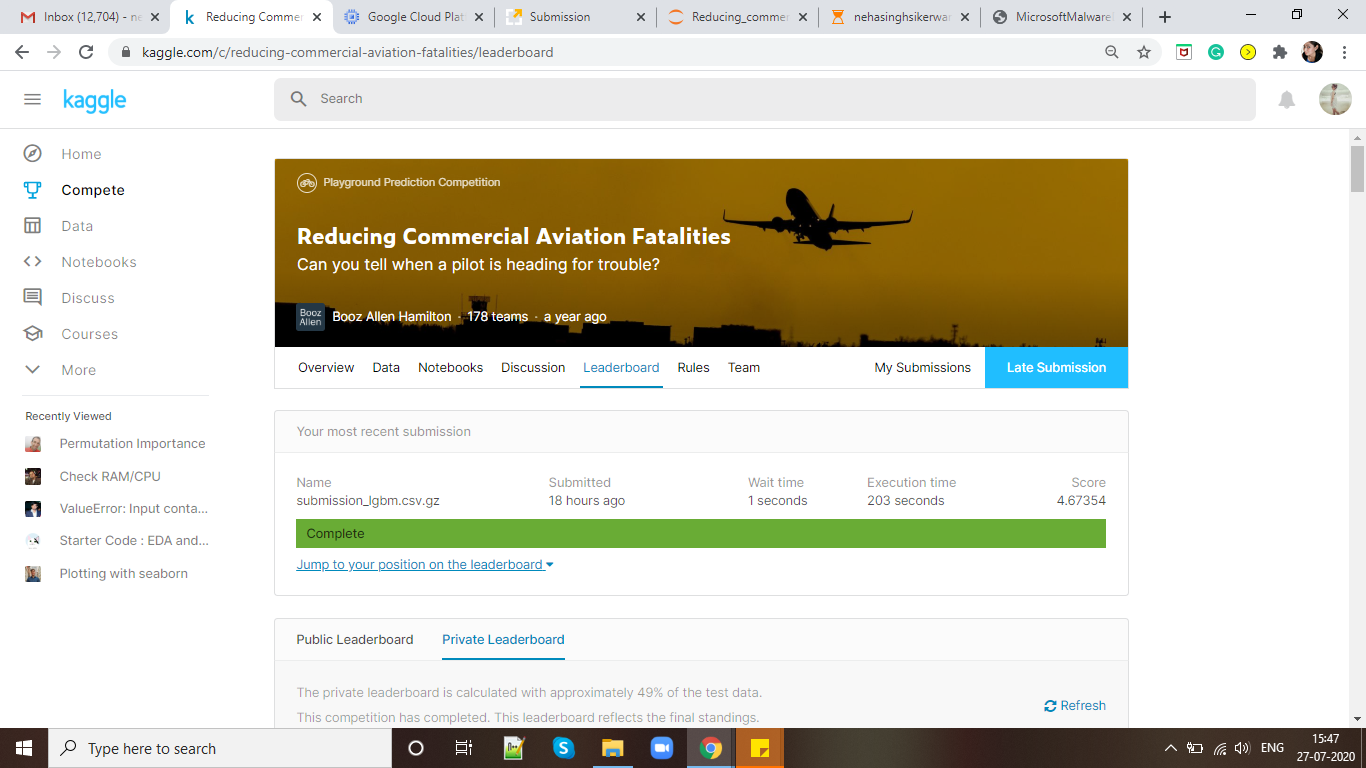


## XGBoost

In [13]:
# hyperparameter tuning with train data sample

df=new_train.sample(90000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df=df.drop(featr,axis=1)
df.head()

train_df, val_df, y_train, y_val = train_test_split(df, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((72000, 120), (18000, 120), 72000, 18000)

In [35]:
from xgboost.sklearn import XGBClassifier
from scipy.stats import uniform, randint

x_cfl=XGBClassifier(weight=[0.5,10,0.7,7], objective='multi:softprob',tree_method='hist', max_delta_step=2, n_jobs=-1, eval_metric='mlogloss')
prams={'learning_rate':uniform(0.03, 0.4),
     'n_estimators':randint(50,200),
     'max_depth':randint(5,30)}

random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1)
random_cfl.fit(train_df, y_train)
print (random_cfl.best_params_)

{'learning_rate': 0.38241502061564765, 'n_estimators': 106, 'max_depth': 11}


In [9]:
# training with full train data

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
new_train.shape

train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [14]:
from xgboost.sklearn import XGBClassifier

x_cfl=XGBClassifier(objective='multi:softprob',eval_metric='mlogloss', max_delta_step=5, tree_method='hist', n_estimators=106, max_depth=11, learning_rate=0.38, n_jobs=-1)
x_cfl.fit(train_df,y_train,verbose=True)
predict_y = x_cfl.predict_proba(train_df)
print(log_loss(y_train, predict_y))
predict_y = x_cfl.predict_proba(val_df)
print("The cross validation log loss is:",log_loss(y_val, predict_y))

0.00024006044310750398
The cross validation log loss is: 0.0008236892036873947


In [31]:
# test data predictions

list_tup=[]
for tup in [(x,y) for x in np.unique(test['crew']) for y in np.unique(test['seat'])]:
    list_tup.append(tup)
    
test_id_f=[]
pred=[]
for i in range(0,18):
    test_df,test_id=test_data_FE(i,list_tup)
    test_id_f.append(test_id)
    test_df=test_df.drop(featr,axis=1)
    y_test_pred=x_cfl.predict_proba(test_df)
    pred.append(y_test_pred)
    print('---------------------------------- loop : ',i+1,' ---------------------------------')

---------------------------------- loop :  1  ---------------------------------
---------------------------------- loop :  2  ---------------------------------
---------------------------------- loop :  3  ---------------------------------
---------------------------------- loop :  4  ---------------------------------
missing gsr
---------------------------------- loop :  5  ---------------------------------
---------------------------------- loop :  6  ---------------------------------
---------------------------------- loop :  7  ---------------------------------
---------------------------------- loop :  8  ---------------------------------
---------------------------------- loop :  9  ---------------------------------
failed "gsr_amp" extraction
---------------------------------- loop :  10  ---------------------------------
---------------------------------- loop :  11  ---------------------------------
---------------------------------- loop :  12  -------------------------------

In [32]:
test_pr=[]
tst_id=[]
for i in pred:
    for j in i:
        test_pr.append(j)
        
for i in test_id_f:
    for j in i:
        tst_id.append(j)

sub=pd.DataFrame(test_pr,columns=['A','B','C','D'])
sub['id']=tst_id
sub=sub[['id','A','B','C','D']]
sub=sub.sort_values(by=['id'])
sub.reset_index(inplace = True) 
sub=sub.drop('index',axis=1)
sub

id         A         B         C         D
0                0  0.999687  0.000033  0.000189  0.000091
1                1  0.863346  0.008624  0.116180  0.011851
2                2  0.999373  0.000046  0.000121  0.000461
3                3  0.781599  0.010629  0.196469  0.011303
4                4  0.999479  0.000041  0.000165  0.000314
...            ...       ...       ...       ...       ...
17965138  17965138  0.936770  0.060522  0.002649  0.000059
17965139  17965139  0.999461  0.000012  0.000456  0.000071
17965140  17965140  0.911677  0.084435  0.003824  0.000063
17965141  17965141  0.999461  0.000012  0.000456  0.000071
17965142  17965142  0.899560  0.095381  0.004958  0.000101

[17965143 rows x 5 columns]

In [33]:
sub.to_csv('submission_xgbm_1.csv.gz',index=False, compression='gzip')

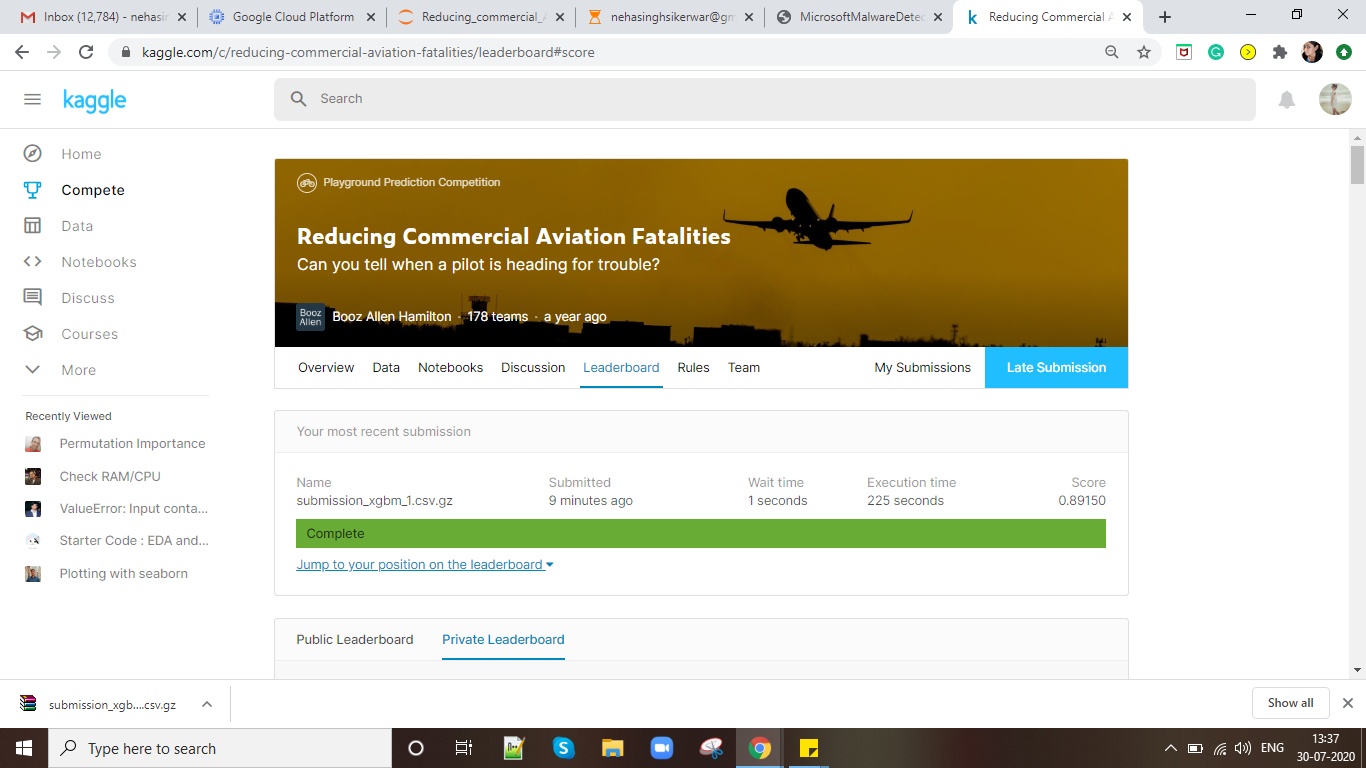

## Random Forest

In [19]:
df=new_train.sample(90000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df=df.drop(featr,axis=1)
df.shape
train_df, val_df, y_train, y_val = train_test_split(df, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((72000, 120), (18000, 120), 72000, 18000)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 5)]
max_depth = [int(x) for x in np.linspace(5, 35, num = 4)]

prams={'n_estimators': n_estimators,
       'max_depth': max_depth}

rf = RandomForestClassifier(class_weight='balanced',n_jobs=-1)
rf_r = RandomizedSearchCV(estimator = rf, param_distributions = prams, verbose=2, random_state=42, n_jobs = -1)
rf_r.fit(train_df, y_train)
print (rf_r.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.2min finished


{'n_estimators': 100, 'max_depth': 25}


In [7]:
# training with full train data

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [20]:

r_cfl=RandomForestClassifier(n_estimators=100, max_depth=25, random_state=42, n_jobs=-1)
r_cfl.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(r_cfl)
sig_clf.fit(train_df,y_train)

predict_y = sig_clf.predict_proba(train_df)
print ("The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(val_df)
print("The cross validation log loss is:",log_loss(y_val, predict_y))


The train log loss is: 0.0212187718371411
The cross validation log loss is: 0.11121686718047841


We can see from CV loss, the performance of random forest is poor than the XGBoost. So we'll move to next model.

## CatBoost

In [7]:
df=new_train.sample(90000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df=df.drop(featr,axis=1)
df.shape
train_df, val_df, y_train, y_val = train_test_split(df, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((72000, 120), (18000, 120), 72000, 18000)

In [8]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.1,0.2,0.3],'iterations': [300]}

cb = CatBoostClassifier(loss_function='MultiClass')
cb_model = GridSearchCV(cb, params,n_jobs=-1)
cb_model.fit(train_df, y_train)
print (cb_model.best_params_)


0:	learn: 1.0340681	total: 747ms	remaining: 3m 43s
1:	learn: 0.8532669	total: 1.41s	remaining: 3m 29s
2:	learn: 0.7087264	total: 2.07s	remaining: 3m 25s
3:	learn: 0.6285890	total: 2.76s	remaining: 3m 24s
4:	learn: 0.5707169	total: 3.44s	remaining: 3m 23s
5:	learn: 0.5282556	total: 4.14s	remaining: 3m 22s
6:	learn: 0.4807023	total: 4.78s	remaining: 3m 20s
7:	learn: 0.4397033	total: 5.47s	remaining: 3m 19s
8:	learn: 0.4104687	total: 6.13s	remaining: 3m 18s
9:	learn: 0.3857413	total: 6.82s	remaining: 3m 17s
10:	learn: 0.3606784	total: 7.49s	remaining: 3m 16s
11:	learn: 0.3458833	total: 8.17s	remaining: 3m 16s
12:	learn: 0.3332622	total: 8.81s	remaining: 3m 14s
13:	learn: 0.3200908	total: 9.49s	remaining: 3m 13s
14:	learn: 0.3028210	total: 10.2s	remaining: 3m 13s
15:	learn: 0.2893339	total: 10.8s	remaining: 3m 12s
16:	learn: 0.2763684	total: 11.5s	remaining: 3m 12s
17:	learn: 0.2652153	total: 12.2s	remaining: 3m 11s
18:	learn: 0.2580110	total: 12.9s	remaining: 3m 10s
19:	learn: 0.2547928	t

In [25]:
# use_best_model=True, eval_set=eval_dataset to find best model iterations

from catboost import Pool
train_dataset = Pool(data=train_df,
                     label=y_train)

eval_dataset = Pool(data=val_df,
                    label=y_val)

clf = CatBoostClassifier(loss_function='MultiClass', depth=10, iterations=1000, l2_leaf_reg= 1, learning_rate= 0.38)
clf.fit(train_dataset, use_best_model=True, eval_set=eval_dataset)
print("Count of trees in model = {}".format(clf.tree_count_))


y_predict=clf.predict_proba(train_df)
print('TRAIN LOSS is ',log_loss(y_train, y_predict))
y_predict=clf.predict_proba(val_df)
print('CV LOSS is ',log_loss(y_val, y_predict))


0:	learn: 0.9584757	test: 0.9537488	best: 0.9537488 (0)	total: 610ms	remaining: 10m 9s
1:	learn: 0.7440640	test: 0.7410102	best: 0.7410102 (1)	total: 1.23s	remaining: 10m 12s
2:	learn: 0.6120653	test: 0.6079750	best: 0.6079750 (2)	total: 1.84s	remaining: 10m 12s
3:	learn: 0.5360013	test: 0.5341823	best: 0.5341823 (3)	total: 2.48s	remaining: 10m 16s
4:	learn: 0.4817079	test: 0.4807530	best: 0.4807530 (4)	total: 3.06s	remaining: 10m 9s
5:	learn: 0.4405264	test: 0.4403896	best: 0.4403896 (5)	total: 3.68s	remaining: 10m 9s
6:	learn: 0.4079496	test: 0.4082326	best: 0.4082326 (6)	total: 4.25s	remaining: 10m 2s
7:	learn: 0.3757881	test: 0.3767762	best: 0.3767762 (7)	total: 4.85s	remaining: 10m 1s
8:	learn: 0.3525693	test: 0.3540374	best: 0.3540374 (8)	total: 5.43s	remaining: 9m 58s
9:	learn: 0.3296255	test: 0.3322832	best: 0.3322832 (9)	total: 6.05s	remaining: 9m 59s
10:	learn: 0.3062696	test: 0.3105304	best: 0.3105304 (10)	total: 6.69s	remaining: 10m 1s
11:	learn: 0.2922034	test: 0.2964209	b

In [13]:
# training with full train data

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [ ]:
from catboost import CatBoostClassifier
from catboost import Pool
train_dataset = Pool(data=train_df,
                     label=y_train)

eval_dataset = Pool(data=val_df,
                    label=y_val)

clf = CatBoostClassifier(loss_function='MultiClass', depth=10, iterations=1000, l2_leaf_reg= 1, learning_rate= 0.38)
clf.fit(train_dataset, use_best_model=True, eval_set=eval_dataset)
print("Count of trees in model = {}".format(clf.tree_count_))


0:	learn: 0.9843333	test: 0.9840206	best: 0.9840206 (0)	total: 11.4s	remaining: 3h 9m 1s
1:	learn: 0.7734221	test: 0.7732115	best: 0.7732115 (1)	total: 22.4s	remaining: 3h 6m 26s
2:	learn: 0.6014114	test: 0.6013031	best: 0.6013031 (2)	total: 37.7s	remaining: 3h 28m 54s
3:	learn: 0.5213668	test: 0.5211523	best: 0.5211523 (3)	total: 52.5s	remaining: 3h 37m 50s
4:	learn: 0.4714117	test: 0.4710449	best: 0.4710449 (4)	total: 1m 4s	remaining: 3h 32m 29s
5:	learn: 0.4219616	test: 0.4216771	best: 0.4216771 (5)	total: 1m 17s	remaining: 3h 34m 53s
6:	learn: 0.3775904	test: 0.3774239	best: 0.3774239 (6)	total: 1m 32s	remaining: 3h 37m 34s
7:	learn: 0.3521778	test: 0.3521122	best: 0.3521122 (7)	total: 1m 43s	remaining: 3h 34m 49s
8:	learn: 0.3261198	test: 0.3261392	best: 0.3261392 (8)	total: 1m 57s	remaining: 3h 35m 49s
9:	learn: 0.3023050	test: 0.3022509	best: 0.3022509 (9)	total: 2m 11s	remaining: 3h 36m 31s
10:	learn: 0.2863865	test: 0.2864168	best: 0.2864168 (10)	total: 2m 22s	remaining: 3h 34

We can see from CV loss, the performance of catboost is poor than the XGBoost. So we'll move to next model.

## SVM (SGDClassifier)

In [6]:
df=new_train.sample(80000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df=df.drop(featr,axis=1)
df.shape

(80000, 120)

In [7]:
train_df, val_df, y_train, y_val = train_test_split(df, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((64000, 120), (16000, 120), 64000, 16000)

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#

alpha = [10 ** x for x in range(-3, 3)]
for i in alpha:
    clf = make_pipeline(StandardScaler(),SGDClassifier(loss='hinge',penalty='l2',class_weight='balanced',eta0=i,n_jobs=-1))
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf)
    sig_clf.fit(train_df, y_train)
    predict_y = sig_clf.predict_proba(train_df)
    print('TRAIN LOSS is ',i,log_loss(y_train, predict_y))
    predict_y=sig_clf.predict_proba(val_df)
    print('CV LOSS is ',i,log_loss(y_val, predict_y))


TRAIN LOSS is  0.001 0.8720556432501266
CV LOSS is  0.001 0.8747265886714645
TRAIN LOSS is  0.01 0.8664445588266754
CV LOSS is  0.01 0.8696406818949567
TRAIN LOSS is  0.1 0.8678965864187506
CV LOSS is  0.1 0.8706483655081254
TRAIN LOSS is  1 0.8658558732377809
CV LOSS is  1 0.8681625883776843
TRAIN LOSS is  10 0.8670826925857118
CV LOSS is  10 0.8692886328944602
TRAIN LOSS is  100 0.8654509588439843
CV LOSS is  100 0.8682710922282438


In [24]:
# full data
y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [25]:
clf = make_pipeline(StandardScaler(),SGDClassifier(loss='hinge',penalty='l2',class_weight='balanced',eta0=1,n_jobs=-1))
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf)
sig_clf.fit(train_df, y_train)
predict_y = sig_clf.predict_proba(train_df)
print('TRAIN LOSS is ',log_loss(y_train, predict_y))
predict_y=sig_clf.predict_proba(val_df)
print('CV LOSS is ',log_loss(y_val, predict_y))


TRAIN LOSS is  0.8698698116734259
CV LOSS is  0.8698199539967327


We can see from CV loss, the performance of SVM is poor than the XGBoost ( XGBoost- best till now). So we'll move to next model.

## Logistic Regression (SGDClassifier)

In [22]:
df=new_train.sample(80000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df=df.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(df, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((64000, 120), (16000, 120), 64000, 16000)

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

alpha = [10 ** x for x in range(-3, 3)]
for i in alpha:
    clf = make_pipeline(StandardScaler(),SGDClassifier(loss='log',penalty='l2',class_weight='balanced',eta0=i,n_jobs=-1))
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf)
    sig_clf.fit(train_df, y_train)
    predict_y = sig_clf.predict_proba(train_df)
    print('TRAIN LOSS is ',log_loss(y_train, predict_y))
    predict_y=sig_clf.predict_proba(val_df)
    print('CV LOSS is ',log_loss(y_val, predict_y))


TRAIN LOSS is  0.8531547428670425
CV LOSS is  0.8573718257954563
TRAIN LOSS is  0.8520681057508018
CV LOSS is  0.8555931013879499
TRAIN LOSS is  0.8543615100825678
CV LOSS is  0.8601929524497007
TRAIN LOSS is  0.8534581367639129
CV LOSS is  0.8585225472996906
TRAIN LOSS is  0.85384547207583
CV LOSS is  0.8590822718273724
TRAIN LOSS is  0.8538086442815045
CV LOSS is  0.8586933339967835


In [15]:
# full data
y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [16]:
clf = make_pipeline(StandardScaler(),SGDClassifier(loss='log',penalty='l2',class_weight='balanced',eta0=0.01,n_jobs=-1))
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf)
sig_clf.fit(train_df, y_train)
predict_y = sig_clf.predict_proba(train_df)
print('TRAIN LOSS is ',log_loss(y_train, predict_y))
predict_y=sig_clf.predict_proba(val_df)
print('CV LOSS is ',log_loss(y_val, predict_y))


TRAIN LOSS is  0.8526831596361619
CV LOSS is  0.8526577092862271


We can see from CV loss, the performance of logistic regression is poor than the XGBoost ( XGBoost- best till now). So we'll move to next model.

## XgBoost 2

We have 2 forms of XGBoost:

1. Direct xgboost library (xgb)
2. sklearn wrapper for XGBoost (XGBClassifier)

In [8]:
# https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
    
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

df=new_train.sample(90000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df=df.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(df, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((72000, 120), (18000, 120), 72000, 18000)

### Tuning Parameters with xgb

In [15]:

dtrain = xgb.DMatrix(train_df, label=y_train)
dcv = xgb.DMatrix(val_df, label=y_val)

params = {'max_depth':6,
    'min_child_weight': 1,
    'gamma':0,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'num_class':4, 
    'scale_pos_weight':1,
    'objective':'multi:softprob', 'eval_metric':'mlogloss'}

model = xgb.train(params,dtrain,num_boost_round=999,evals=[(dcv, "Test")],early_stopping_rounds=10)

print(model.best_score,model.best_iteration+1)

# training with default params for later reference. next will do the hyperparameter tuning

[0]	Test-mlogloss:1.12452
Will train until Test-mlogloss hasn't improved in 10 rounds.
[1]	Test-mlogloss:0.95366
[2]	Test-mlogloss:0.84074
[3]	Test-mlogloss:0.75555
[4]	Test-mlogloss:0.68949
[5]	Test-mlogloss:0.62257
[6]	Test-mlogloss:0.57108
[7]	Test-mlogloss:0.51839
[8]	Test-mlogloss:0.47667
[9]	Test-mlogloss:0.44308
[10]	Test-mlogloss:0.40764
[11]	Test-mlogloss:0.38641
[12]	Test-mlogloss:0.36883
[13]	Test-mlogloss:0.34923
[14]	Test-mlogloss:0.32720
[15]	Test-mlogloss:0.30753
[16]	Test-mlogloss:0.29181
[17]	Test-mlogloss:0.28132
[18]	Test-mlogloss:0.26581
[19]	Test-mlogloss:0.25529
[20]	Test-mlogloss:0.24168
[21]	Test-mlogloss:0.23234
[22]	Test-mlogloss:0.22613
[23]	Test-mlogloss:0.21920
[24]	Test-mlogloss:0.21218
[25]	Test-mlogloss:0.20705
[26]	Test-mlogloss:0.20300
[27]	Test-mlogloss:0.19861
[28]	Test-mlogloss:0.19311
[29]	Test-mlogloss:0.18810
[30]	Test-mlogloss:0.18424
[31]	Test-mlogloss:0.17473
[32]	Test-mlogloss:0.17167
[33]	Test-mlogloss:0.16564
[34]	Test-mlogloss:0.15912
[35]

In [24]:
def xgboost_cal(f1,f2,gridsearch_params):
    ''' takes features and do param tuning with xgb.csv '''
    
    min_loss = float("Inf")
    best_params = None


    for a, b in gridsearch_params:
        params[f1] = a
        params[f2] = b

        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=999,
            seed=42,
            nfold=3,
            metrics={'mlogloss'},
            early_stopping_rounds=10
        )

        mean_loss = cv_results['test-mlogloss-mean'].min()
        boost_rounds = cv_results['test-mlogloss-mean'].argmin()
        print(mean_loss, boost_rounds)
        if mean_loss < min_loss:
            min_loss = mean_loss
            best_params = (a,b)
    print("Best params: {}, {}, Loss: {}".format(best_params[0], best_params[1], min_loss))
    return best_params[0], best_params[1]

#### Step-1 : tuning 'max_depth' and 'min_child_weight'

In [25]:
# tuning 'max_depth' and 'min_child_weight'

gridsearch_params = [(depth, child_weight) for depth in range(9,12) for child_weight in range(5,8)]
depth,c_weight=xgboost_cal('max_depth','min_child_weight',gridsearch_params)
params['max_depth'] = depth
params['min_child_weight'] = c_weight

0.06649100000000001 129
0.06830066666666666 142
0.06823166666666666 160
0.06722333333333333 111
0.06872 123
0.06779433333333333 134
0.06713766666666666 109
0.06776833333333333 113
0.069507 133
Best params: 9, 5, Loss: 0.06649100000000001


#### Step-2 : tuning 'subsample' and 'colsample_bytree'

In [27]:
# tuning 'subsample' and 'colsample_bytree'

gridsearch_params = [(s, c) for s in [i/10. for i in range(7,11)] for c in [i/10. for i in range(7,11)]]
subsample,colsample_bytree=xgboost_cal('subsample','colsample_bytree',gridsearch_params)
params['subsample'] = subsample
params['colsample_bytree'] = colsample_bytree

0.07875566666666667 164
0.07774066666666667 133
0.07695466666666666 132
0.07596333333333333 124
0.07623266666666667 149
0.073443 128
0.07268566666666666 135
0.07318000000000001 127
0.072394 138
0.071999 139
0.07063533333333334 138
0.07056733333333333 116
0.07034566666666668 145
0.069494 151
0.06819533333333333 131
0.06649100000000001 129
Best params: 1.0, 1.0, Loss: 0.06649100000000001


#### Step-3 : tuning Learning rate

In [8]:
# tuning 'learning rate' or 'eta'

for i in [0.01,0.1,0.2,0.3,0.38]:
    params['eta'] = i
    cv_results = xgb.cv(params,dtrain,num_boost_round=999,seed=42,nfold=3,metrics=['mlogloss'],early_stopping_rounds=10)
    mean_loss = cv_results['test-mlogloss-mean'].min()
    boost_rounds = cv_results['test-mlogloss-mean'].argmin()
    print(mean_loss, boost_rounds)
    if mean_loss < min_loss:
        min_loss = mean_loss
        best_params = i
print("Best params: {}, Loss: {}".format(best_params, min_loss))
params['eta']=best_params

0.10636433333333332 998
0.06819233333333333 383
0.068537 225
0.06932033333333333 125
0.06988266666666666 112
Best params: 0.1, Loss: 0.06819233333333333


In [10]:
# tuning 'learning rate' or 'eta' ---> narrowing down the range

min_loss = float("Inf")
best_params = None

for i in [0.08,0.12,0.15]:
    params['eta'] = i
    cv_results = xgb.cv(params,dtrain,num_boost_round=999,seed=42,nfold=3,metrics=['mlogloss'],early_stopping_rounds=10)
    mean_loss = cv_results['test-mlogloss-mean'].min()
    boost_rounds = cv_results['test-mlogloss-mean'].argmin()
    print(mean_loss, boost_rounds)
    if mean_loss < min_loss:
        min_loss = mean_loss
        best_params = i
print("Best params: {}, Loss: {}".format(best_params, min_loss))
params['eta']=best_params

0.067603 519
0.06806566666666668 331
0.06918733333333334 262
Best params: 0.08, Loss: 0.067603


params = {'max_depth':9,
    'min_child_weight': 5,
    'eta':0.08,
    'subsample': 1,
    'colsample_bytree': 1,
    'num_class':4, 
    'scale_pos_weight':1,
    'objective':'multi:softprob', 'eval_metric':'mlogloss'}


#### Step-4 : finding optimal estimators 

In [48]:
# finding 'num_boost_round'

dtrain = xgb.DMatrix(train_df, label=y_train)
dcv = xgb.DMatrix(val_df, label=y_val)

cvresult = xgb.cv(params, dtrain, num_boost_round=999, nfold=3,seed=42,
            metrics=['mlogloss'], early_stopping_rounds=10)
n_estimators=cvresult.shape[0]

n_estimators

425

#### Final training

In [13]:
# full data

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [53]:
dtrain = xgb.DMatrix(train_df, label=y_train)
dcv = xgb.DMatrix(val_df, label=y_val)

model = xgb.train(params,dtrain,num_boost_round=n_estimators,evals=[(dcv, "Test")])


[12:14:43] WARNING: /workspace/src/learner.cc:480: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	Test-mlogloss:1.30171
[1]	Test-mlogloss:1.21594
[2]	Test-mlogloss:1.14316
[3]	Test-mlogloss:1.07392
[4]	Test-mlogloss:1.01561
[5]	Test-mlogloss:0.95997
[6]	Test-mlogloss:0.90928
[7]	Test-mlogloss:0.86623
[8]	Test-mlogloss:0.82268
[9]	Test-mlogloss:0.78995
[10]	Test-mlogloss:0.75958
[11]	Test-mlogloss:0.72835
[12]	Test-mlogloss:0.69708
[13]	Test-mlogloss:0.67191
[14]	Test-mlogloss:0.64933
[15]	Test-mlogloss:0.62838
[16]	Test-mlogloss:0.60762
[17]	Test-mlogloss:0.58873
[18]	Test-mlogloss:0.57142
[19]	Test-mlogloss:0.54702
[20]	Test-mlogloss:0.53069
[21]	Test-mlogloss:0.51020
[22]	Test-mlogloss:0.48978
[23]	Test-mlogloss:0.47505
[24]	Test-mlogloss

In [66]:
pr=model.predict(dtrain)
log_loss(y_train, pr)

0.007250603937307788

In [67]:
pr=model.predict(dcv)
log_loss(y_val,pr)

0.047419433995244564

Param tuning with xgb.cv and learning rate 0.08, model performance is not that good. May be if we increase either learning rate or n_estimators we get better performance.  

### Tuning Parameters with XGBClassifier

#### Step-1 : set learning rate to 0.3 and find number of estimators (n_estimators)

In [68]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

x_cfl=XGBClassifier(
            objective='multi:softprob',eval_metric='mlogloss', max_delta_step=5, tree_method='hist', 
            n_estimators=1000, max_depth=9, min_child_weight=5, learning_rate=0.3, n_jobs=-1)

evaluation = [(train_df, y_train), ( val_df, y_val)]

x_cfl.fit(train_df,y_train,eval_set=evaluation, eval_metric="mlogloss", early_stopping_rounds=10)
print(x_cfl.evals_result())

[0]	validation_0-mlogloss:1.05886	validation_1-mlogloss:1.06784
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.85813	validation_1-mlogloss:0.86952
[2]	validation_0-mlogloss:0.69955	validation_1-mlogloss:0.71330
[3]	validation_0-mlogloss:0.58964	validation_1-mlogloss:0.60531
[4]	validation_0-mlogloss:0.49906	validation_1-mlogloss:0.51513
[5]	validation_0-mlogloss:0.43085	validation_1-mlogloss:0.44819
[6]	validation_0-mlogloss:0.37322	validation_1-mlogloss:0.39190
[7]	validation_0-mlogloss:0.32637	validation_1-mlogloss:0.34625
[8]	validation_0-mlogloss:0.28656	validation_1-mlogloss:0.30794
[9]	validation_0-mlogloss:0.25230	validation_1-mlogloss:0.27498
[10]	validation_0-mlogloss:0.22398	validation_1-mlogloss:0.24826
[11]	validation_0-mlogloss:0.20047	validation_1-mlogloss:0.22623
[12]	validation_0-mlogloss:0.18327	validation_1-mlogloss:0.2096

#### Step-2 : finding max_depth and min_child_weight

In [11]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(7,14,2),
 'min_child_weight':range(4,7)}

random_cfl=RandomizedSearchCV(XGBClassifier(
                                        learning_rate =0.3, n_estimators=177,
                                        objective='multi:softprob',eval_metric='mlogloss', nthread=4,
                                        seed=27),param_distributions=param_test1,cv=3,verbose=10,n_jobs=-1)
random_cfl.fit(train_df, y_train)
random_cfl.best_params_,random_cfl.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 56.4min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 88.5min remaining: 51.2min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 101.4min remaining: 30.9min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 115.7min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 117.6min finished


({'max_depth': 13, 'min_child_weight': 4}, 0.977763888888889)

In [13]:
x_cfl=XGBClassifier(
                objective='multi:softprob',eval_metric='mlogloss', 
                max_delta_step=14, tree_method='hist', 
                n_estimators=177, learning_rate =0.3,
                max_depth = 13, seed=27,nthread=4,
                min_child_weight = 4, n_jobs=-1)

x_cfl.fit(train_df,y_train,verbose=True)

predict_y = x_cfl.predict_proba(train_df)
print("The train log loss is:",log_loss(y_train, predict_y))
predict_y = x_cfl.predict_proba(val_df)
print("The cross validation log loss is:",log_loss(y_val, predict_y))

The train log loss is: 0.0014369631745504334
The cross validation log loss is: 0.0378758928825291


#### Step-3 : finding gamma

In [12]:
param_test1 = {'gamma':[i/10.0 for i in range(0,3)]}

random_cfl=RandomizedSearchCV(XGBClassifier(
                                        learning_rate =0.3, n_estimators=177,max_depth=13, min_child_weight=4,
                                        objective='multi:softprob',eval_metric='mlogloss', nthread=4,
                                        seed=27),param_distributions=param_test1,cv=3,verbose=10,n_jobs=-1)
random_cfl.fit(train_df, y_train)
random_cfl.best_params_,random_cfl.best_score_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed: 36.9min remaining: 129.3min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed: 37.1min remaining: 74.2min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed: 38.1min remaining: 47.6min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed: 38.2min remaining: 30.6min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed: 38.3min remaining: 19.1min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed: 38.8min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 43.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 43.3min finished


({'gamma': 0.0}, 0.977763888888889)

In [19]:
x_cfl=XGBClassifier(
                objective='multi:softprob',eval_metric='mlogloss', 
                max_delta_step=14, tree_method='hist', 
                n_estimators=177, learning_rate =0.3,
                max_depth = 13, seed=27,nthread=4, gamma=0,
                min_child_weight = 4, n_jobs=-1)

x_cfl.fit(train_df,y_train,verbose=True)

predict_y = x_cfl.predict_proba(train_df)
print("The train log loss is:",log_loss(y_train, predict_y))
predict_y = x_cfl.predict_proba(val_df)
print("The cross validation log loss is:",log_loss(y_val, predict_y))

The train log loss is: 0.0014369631745504334
The cross validation log loss is: 0.0378758928825291


#### Step-4 : finding subsample and colsample_bytree

In [21]:
param_test1 = {
 'subsample':[i/100.0 for i in range(80,101,5)],
 'colsample_bytree':[i/100.0 for i in range(80,101,5)]}

random_cfl=RandomizedSearchCV(XGBClassifier(
                                        objective='multi:softprob',eval_metric='mlogloss', nthread=4, 
                                        max_delta_step=14, tree_method='hist',seed=27, learning_rate =0.3, 
                                        n_estimators=177, max_depth=13, min_child_weight=4, gamma=0
                                        ),param_distributions=param_test1,cv=3,verbose=10,n_jobs=-1)
random_cfl.fit(train_df, y_train)
random_cfl.best_params_,random_cfl.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 34.3min remaining: 19.9min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 35.0min remaining: 10.6min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 41.9min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 42.0min finished


({'colsample_bytree': 0.95, 'subsample': 1.0}, 0.9763472222222221)

In [22]:
x_cfl=XGBClassifier(
                objective='multi:softprob',eval_metric='mlogloss', 
                max_delta_step=14, tree_method='hist', 
                n_estimators=177, learning_rate =0.3,
                max_depth = 13, seed=27, nthread=4, gamma=0,
                min_child_weight = 4, n_jobs=-1, subsample=1, colsample_bytree=0.95)

x_cfl.fit(train_df,y_train,verbose=True)

predict_y = x_cfl.predict_proba(train_df)
print("The train log loss is:",log_loss(y_train, predict_y))
predict_y = x_cfl.predict_proba(val_df)
print("The cross validation log loss is:",log_loss(y_val, predict_y))

The train log loss is: 0.0014308520202687305
The cross validation log loss is: 0.037640506114396434


#### Step-5 :  Tuning Regularization Parameters

In [23]:
for i in [1e-3, 1e-2, 0.1, 1, 10]:
    random_cfl=XGBClassifier(learning_rate=0.3, n_estimators=177,
                             max_delta_step=14, tree_method='hist', min_child_weight = 4,
                             objective='multi:softprob',eval_metric='mlogloss', nthread=4, max_depth = 13,
                             seed=27,reg_alpha=i,n_jobs=-1,subsample=1, colsample_bytree=0.95)
    random_cfl.fit(train_df, y_train)
    predict_y = random_cfl.predict_proba(train_df)
    print("The train log loss is:",log_loss(y_train, predict_y))
    predict_y = random_cfl.predict_proba(val_df)
    print("The cross validation log loss is:",log_loss(y_val, predict_y))


The train log loss is: 0.0014489360005278623
The cross validation log loss is: 0.03860493085944829
The train log loss is: 0.001450179148062999
The cross validation log loss is: 0.0394539491604009
The train log loss is: 0.0014821685200999358
The cross validation log loss is: 0.03786734197049854
The train log loss is: 0.002982256365096046
The cross validation log loss is: 0.038207542646398224
The train log loss is: 0.021006336835214925
The cross validation log loss is: 0.05890475003377247


#### Final training

In [6]:
# full data
from xgboost.sklearn import XGBClassifier

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [27]:
random_cfl=XGBClassifier(learning_rate=0.3, n_estimators=177,
                             max_delta_step=14, tree_method='hist', min_child_weight = 4,
                             objective='multi:softprob',eval_metric='mlogloss', nthread=4, max_depth = 13,
                             seed=27,n_jobs=-1,subsample=1, colsample_bytree=0.95,reg_alpha=0.1)
random_cfl.fit(train_df, y_train)

predict_y = random_cfl.predict_proba(train_df)
print("The train log loss is:",log_loss(y_train, predict_y))
predict_y = random_cfl.predict_proba(val_df)
print("The cross validation log loss is:",log_loss(y_val, predict_y))

The train log loss is: 0.000154881986323408
The cross validation log loss is: 0.000754514872950122


In [18]:
# saving the model as it's the best model yet

pickle.dump(random_cfl, open("xgb_model.pickle.dat", "wb"))

In [14]:
# test data predictions

list_tup=[]
for tup in [(x,y) for x in np.unique(test['crew']) for y in np.unique(test['seat'])]:
    list_tup.append(tup)
    
test_id_f=[]
pred=[]
for i in range(0,18):
    test_df,test_id=test_data_FE(i,list_tup)
    test_id_f.append(test_id)
    test_df=test_df.drop(featr,axis=1)
    y_test_pred=random_cfl.predict_proba(test_df)
    pred.append(y_test_pred)
    print('---------------------------------- loop : ',i+1,' ---------------------------------')

---------------------------------- loop :  1  ---------------------------------
---------------------------------- loop :  2  ---------------------------------
---------------------------------- loop :  3  ---------------------------------
---------------------------------- loop :  4  ---------------------------------
missing gsr
---------------------------------- loop :  5  ---------------------------------
---------------------------------- loop :  6  ---------------------------------
---------------------------------- loop :  7  ---------------------------------
---------------------------------- loop :  8  ---------------------------------
---------------------------------- loop :  9  ---------------------------------
failed "gsr_amp" extraction
---------------------------------- loop :  10  ---------------------------------
---------------------------------- loop :  11  ---------------------------------
---------------------------------- loop :  12  -------------------------------

In [15]:
test_pr=[]
tst_id=[]
for i in pred:
    for j in i:
        test_pr.append(j)
        
for i in test_id_f:
    for j in i:
        tst_id.append(j)

sub=pd.DataFrame(test_pr,columns=['A','B','C','D'])
sub['id']=tst_id
sub=sub[['id','A','B','C','D']]
sub=sub.sort_values(by=['id'])
sub.reset_index(inplace = True) 
sub=sub.drop('index',axis=1)
sub.head()

id         A         B         C         D
0   0  0.994353  0.001942  0.003600  0.000106
1   1  0.955771  0.003552  0.037387  0.003290
2   2  0.991723  0.002599  0.005394  0.000284
3   3  0.879917  0.003502  0.114386  0.002195
4   4  0.990729  0.002589  0.006597  0.000084

In [16]:
sub.to_csv('submission_xgbm_2.csv.gz',index=False, compression='gzip')

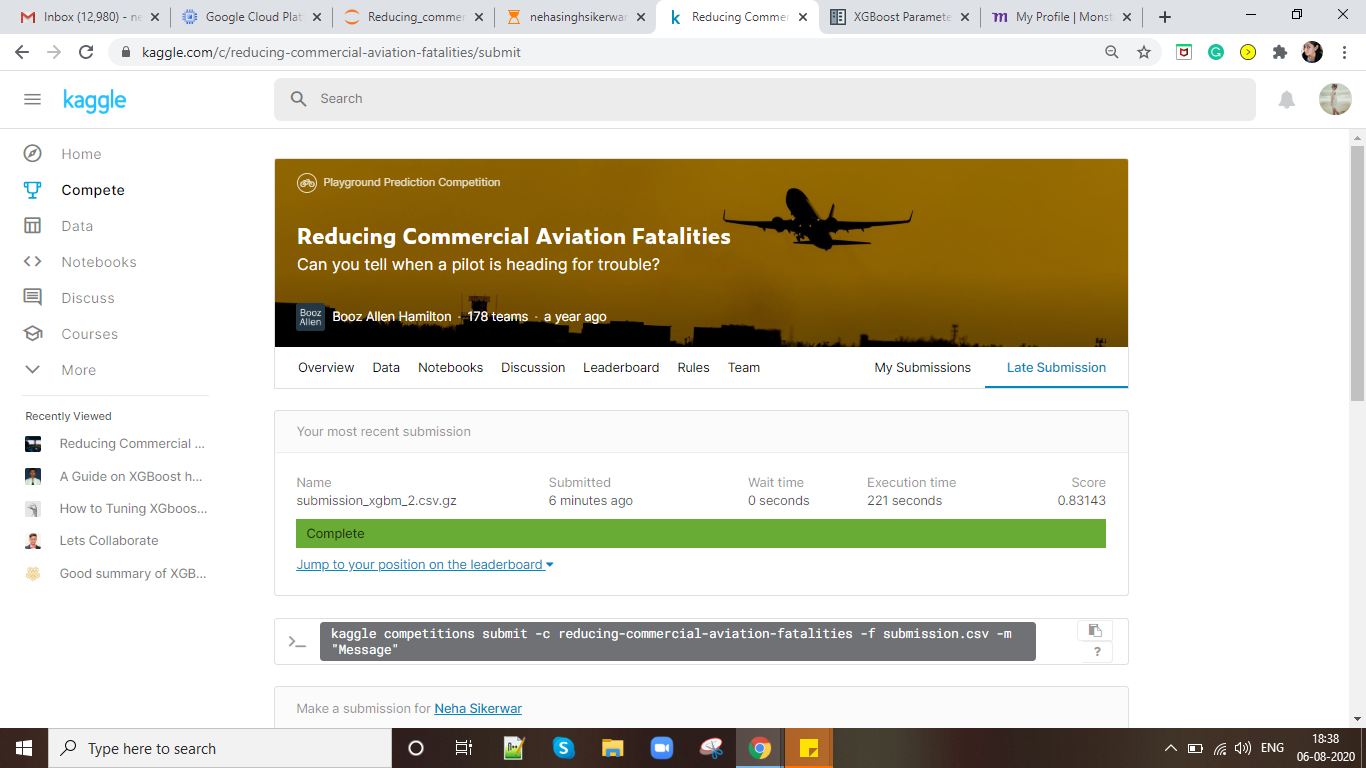

## xgboost part-3

In [18]:
df=new_train.sample(90000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df=df.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(df, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((72000, 120), (18000, 120), 72000, 18000)

In [26]:
# https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning

import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

param={'max_depth': hp.quniform("max_depth", 3, 15, 1),
        'gamma': hp.uniform ('gamma', 1,6),
        'reg_alpha' : hp.quniform('reg_alpha', 0,50,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 1000,
        'seed': 0}


def tuning_para(param):
    clf=xgb.XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',
                    n_estimators =param['n_estimators'], max_depth = int(param['max_depth']), gamma = param['gamma'],
                    reg_alpha = int(param['reg_alpha']),min_child_weight=int(param['min_child_weight']),
                    colsample_bytree=int(param['colsample_bytree']))
    
    evaluation = [(train_df, y_train), ( val_df, y_val)]
    
    clf.fit(train_df, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    
    predict = clf.predict_proba(val_df)
    #print(predict)
    loss=log_loss(y_val, predict)
    print ("val loss :", loss)
    return {'loss': loss, 'status': STATUS_OK }

hyperparams=fmin(fn=tuning_para, space=param, algo=tpe.suggest, max_evals=100, trials=Trials())
hyperparams

val loss :                                             
0.37175550568432986                                    
val loss :                                                                          
0.30791516320944035                                                                 
val loss :                                                                          
0.3825919120676376                                                                  
val loss :                                                                          
0.49702040890159294                                                                 
val loss :                                                                          
0.3632421203510668                                                                  
val loss :                                                                          
0.3213784543173226                                                                  
val loss :                            

{'colsample_bytree': 0.7824039477407645,
 'gamma': 1.1590357546482402,
 'max_depth': 15.0,
 'min_child_weight': 0.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.7093293854468173}

In [27]:
# full data

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [ ]:
x_cfl=xgb.XGBClassifier(
                objective='multi:softprob',eval_metric='mlogloss', 
                max_delta_step=14, tree_method='hist', 
                n_estimators=1000, colsample_bytree = int(0.7824039477407645),
                gamma= 1.1590357546482402, max_depth = int(15),
                min_child_weight =0,reg_alpha =0,
                reg_lambda= 0.7093293854468173, n_jobs=-1)

evaluation = [(train_df, y_train), ( val_df, y_val)]

x_cfl.fit(train_df, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10)



[0]	validation_0-mlogloss:1.23674	validation_1-mlogloss:1.23503
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.13586	validation_1-mlogloss:1.13450
[2]	validation_0-mlogloss:1.05103	validation_1-mlogloss:1.05014
[3]	validation_0-mlogloss:0.99795	validation_1-mlogloss:1.00222
[4]	validation_0-mlogloss:0.96609	validation_1-mlogloss:0.96729
[5]	validation_0-mlogloss:0.94279	validation_1-mlogloss:0.94109
[6]	validation_0-mlogloss:0.92294	validation_1-mlogloss:0.92061
[7]	validation_0-mlogloss:0.89452	validation_1-mlogloss:0.89377
[8]	validation_0-mlogloss:0.88253	validation_1-mlogloss:0.88243
[9]	validation_0-mlogloss:0.87441	validation_1-mlogloss:0.87480
[10]	validation_0-mlogloss:0.86597	validation_1-mlogloss:0.86697
[11]	validation_0-mlogloss:0.86014	validation_1-mlogloss:0.86133
[12]	validation_0-mlogloss:0.83902	validation_1-mlogloss:0.8398

param tuning with hyperopt not giving better model performance. I have memory and computational constraints, otherwise may be incresing either learning rate or n_esimators improve the performance. For 1000 estimators it took nearly 10 hours.

## Deep Neural Networks - 1d-CNN

In [5]:
# https://github.com/meitetsu3/1DCNN/blob/master/1DCNN_demo.ipynb

import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint


In [12]:
y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)

Y_train_D_hot = keras.utils.to_categorical(y-1, 4)

train_df, val_df, y_train, y_val = train_test_split(new_train, Y_train_D_hot, stratify=y, test_size=0.2, random_state=32)

train_df=np.asarray(train_df).astype('float32').reshape(train_df.shape[0], train_df.shape[1], 1)
val_df=np.asarray(val_df).astype('float32').reshape(val_df.shape[0], val_df.shape[1],1)

train_df.shape, val_df.shape, y_train.shape, y_val.shape

((3346256, 120, 1), (836564, 120, 1), (3346256, 4), (836564, 4))

In [6]:
# model architecture

model_n = Sequential()

# Layer 1
model_n.add(Conv1D(filters=16, kernel_size=64,strides = 16, padding='same', activation='relu', input_shape=(120,1)))
model_n.add(MaxPooling1D(pool_size=2,padding='same'))

# Layer 2
model_n.add(Conv1D(filters=16, kernel_size=3, strides = 1, padding='same', activation='relu'))
model_n.add(MaxPooling1D(pool_size=2,padding='same'))

# Layer 3
model_n.add(Conv1D(filters=32, kernel_size=3, strides = 1, padding='same', activation='relu'))
model_n.add(MaxPooling1D(pool_size=2,padding='same'))
model_n.add(Dropout(0.2))

# Layer 4
model_n.add(Conv1D(filters=32, kernel_size=3, strides = 1, padding='same', activation='relu'))
model_n.add(MaxPooling1D(pool_size=2,padding='same'))
model_n.add(Dropout(0.2))

# Layer 5
model_n.add(Conv1D(filters=32, kernel_size=3, strides = 1, padding='same', activation='relu'))
model_n.add(keras.layers.GlobalMaxPooling1D())

# Dense Layer
model_n.add(Dense(50, activation='relu'))
model_n.add(Dropout(0.2))

# Output Layer
model_n.add(Dense(4, activation='softmax'))

model_n.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 16)             1040      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 16)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 16)             784       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 16)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 32)             1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 32)             0

In [15]:
from keras.callbacks import TensorBoard
import datetime

# Compile
model_n.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


#Callbacks
log_dir="logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)
checkpoint = ModelCheckpoint(filepath='CNNC2.weights.best.hdf5', verbose=1, save_best_only=True)

# training
model_n.fit(train_df, y_train, batch_size=32, epochs=10,
          validation_data=(val_df, y_val), callbacks=[checkpoint,tensorboard_callback], 
          verbose=1, shuffle=True)

# load the weights that yielded the best validation accuracy
model_n.load_weights('CNNC2.weights.best.hdf5')

# evaluate and print test accuracy

score = model_n.evaluate(train_df, y_train, verbose=0)
print('\n', 'CNN train accuracy:', score[1])

score = model_n.evaluate(val_df, y_val, verbose=0)
print('\n', 'CNN validation accuracy:', score[1])

Epoch 1/10
104569/104571 [============================>.] - ETA: 0s - accuracy: 0.7585 - loss: 0.6112
Epoch 00001: val_loss improved from inf to 0.56838, saving model to CNNC2.weights.best.hdf5
104571/104571 [==============================] - 270s 3ms/step - accuracy: 0.7584 - loss: 0.6112 - val_accuracy: 0.7746 - val_loss: 0.5684
Epoch 2/10
 98885/104571 [===========================>..] - ETA: 13s - accuracy: 0.7732 - loss: 0.5771
Epoch 00002: val_loss improved from 0.56838 to 0.56626, saving model to CNNC2.weights.best.hdf5
104571/104571 [==============================] - 270s 3ms/step - accuracy: 0.7737 - loss: 0.5765 - val_accuracy: 0.7761 - val_loss: 0.5663
Epoch 3/10
104565/104571 [============================>.] - ETA: 0s - accuracy: 0.7856 - loss: 0.5509
Epoch 00003: val_loss improved from 0.56626 to 0.51858, saving model to CNNC2.weights.best.hdf5
104571/104571 [==============================] - 265s 3ms/step - accuracy: 0.7856 - loss: 0.5509 - val_accuracy: 0.8086 - val_loss:

In [17]:
print('CNN train loss is', score[0])

print('CNN validation loss is', score[0])

CNN train loss is 0.4505651593208313
CNN validation loss is 0.4505651593208313


In [22]:
# test data predictions

list_tup=[]
for tup in [(x,y) for x in np.unique(test['crew']) for y in np.unique(test['seat'])]:
    list_tup.append(tup)
    
test_id_f=[]
pred=[]
for i in range(0,18):
    test_df,test_id=test_data_FE(i,list_tup)
    test_id_f.append(test_id)
    test_df=test_df.drop(featr,axis=1)
    test_df=test_df.replace(np.nan,0)
    test_df=np.asarray(test_df).astype('float32').reshape(test_df.shape[0], test_df.shape[1], 1)
    y_test_pred=model_n.predict(test_df)
    pred.append(y_test_pred)
    print('---------------------------------- loop : ',i+1,' ---------------------------------')

---------------------------------- loop :  1  ---------------------------------
---------------------------------- loop :  2  ---------------------------------
---------------------------------- loop :  3  ---------------------------------
---------------------------------- loop :  4  ---------------------------------
missing gsr
---------------------------------- loop :  5  ---------------------------------
---------------------------------- loop :  6  ---------------------------------
---------------------------------- loop :  7  ---------------------------------
---------------------------------- loop :  8  ---------------------------------
---------------------------------- loop :  9  ---------------------------------
failed "gsr_amp" extraction
---------------------------------- loop :  10  ---------------------------------
---------------------------------- loop :  11  ---------------------------------
---------------------------------- loop :  12  -------------------------------

In [23]:
test_pr=[]
tst_id=[]
for i in pred:
    for j in i:
        test_pr.append(j)
        
for i in test_id_f:
    for j in i:
        tst_id.append(j)

sub=pd.DataFrame(test_pr,columns=['A','B','C','D'])
sub['id']=tst_id
sub=sub[['id','A','B','C','D']]
sub=sub.sort_values(by=['id'])
sub.reset_index(inplace = True) 
sub=sub.drop('index',axis=1)
sub.head()

id             A    B             C    D
0   0  0.000000e+00  0.0  2.971665e-31  1.0
1   1  2.733429e-10  0.0  1.245971e-11  1.0
2   2  0.000000e+00  0.0  2.377329e-31  1.0
3   3  1.708287e-09  0.0  7.901020e-11  1.0
4   4  0.000000e+00  0.0  2.562986e-31  1.0

In [25]:
sub.to_csv('submission_CNN1D.csv.gz',index=False, compression='gzip')

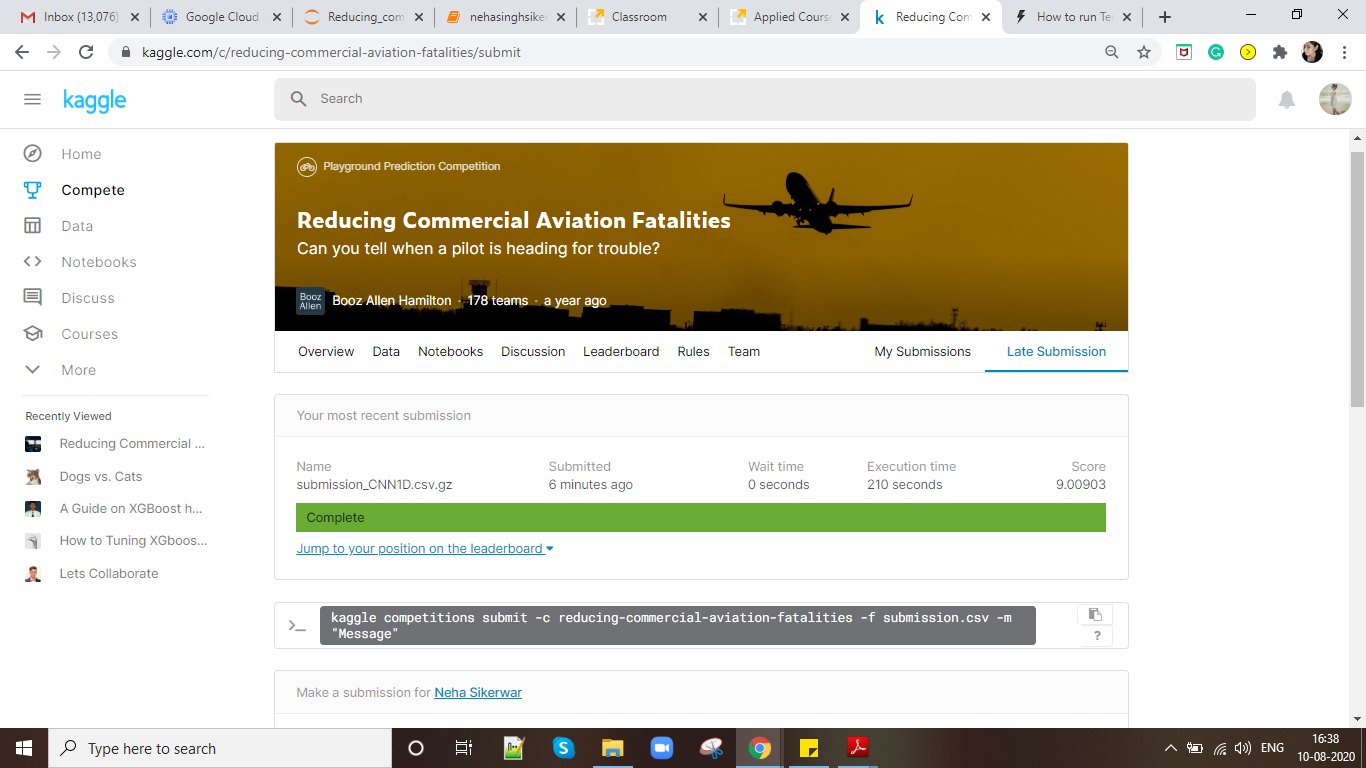

## Dense Neural Network

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)

Y_train_D_hot = keras.utils.to_categorical(y-1, 4)

train_df, val_df, y_train, y_val = train_test_split(new_train, Y_train_D_hot, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, y_train.shape, y_val.shape

((3346256, 120), (836564, 120), (3346256, 4), (836564, 4))

In [11]:
# model architecture

model_n = Sequential()
model_n.add(keras.Input(shape=(120,)))

# Dense layer 1
model_n.add(Dense(50,activation='relu',kernel_initializer=keras.initializers.he_uniform(seed=30)))

# Dense layer 2
model_n.add(Dense(50,activation='relu',kernel_initializer=keras.initializers.he_uniform(seed=30)))

# Dense layer 3
model_n.add(Dense(50,activation='relu',kernel_initializer=keras.initializers.he_uniform(seed=30)))

# Dense layer 4
model_n.add(Dense(50,activation='relu',kernel_initializer=keras.initializers.he_uniform(seed=30)))

# Dense layer 5
model_n.add(Dense(50,activation='relu',kernel_initializer=keras.initializers.he_uniform(seed=30)))

#output layer
model_n.add(Dense(4,activation='softmax',kernel_initializer=keras.initializers.he_uniform(seed=30)))

model_n.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                6050      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 204       
Total params: 16,454
Trainable params: 16,454
Non-trainable params: 0
____________________________________________________

In [9]:
from keras.callbacks import TensorBoard
import datetime

# Compile
model_n.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


#Callbacks
log_dir="logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)
checkpoint = ModelCheckpoint(filepath='DenseNet.weights.best.hdf5', verbose=1, save_best_only=True)

# training
model_n.fit(train_df, y_train, batch_size=32, epochs=12,
          validation_data=(val_df, y_val), callbacks=[checkpoint,tensorboard_callback], 
          verbose=1, shuffle=True)

# load the weights that yielded the best validation accuracy
model_n.load_weights('DenseNet.weights.best.hdf5')

# evaluate and print test accuracy

score = model_n.evaluate(train_df, y_train, verbose=0)
print('\n', 'train loss:', score[0])

score = model_n.evaluate(val_df, y_val, verbose=0)
print('\n', 'validation loss:', score[0])

Epoch 1/12
104571/104571 [==============================] - ETA: 0s - loss: 0.8853 - accuracy: 0.7391
Epoch 00001: val_loss improved from inf to 0.54442, saving model to DenseNet.weights.best.hdf5
104571/104571 [==============================] - 281s 3ms/step - loss: 0.8853 - accuracy: 0.7391 - val_accuracy: 0.7799 - val_loss: 0.5444
Epoch 2/12
104555/104571 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.7887
Epoch 00002: val_loss improved from 0.54442 to 0.53116, saving model to DenseNet.weights.best.hdf5
104571/104571 [==============================] - 281s 3ms/step - loss: 0.5412 - accuracy: 0.7887 - val_accuracy: 0.7919 - val_loss: 0.5312
Epoch 3/12
104563/104571 [============================>.] - ETA: 0s - loss: 0.5250 - accuracy: 0.7948
Epoch 00003: val_loss improved from 0.53116 to 0.48993, saving model to DenseNet.weights.best.hdf5
104571/104571 [==============================] - 280s 3ms/step - loss: 0.5250 - accuracy: 0.7948 - val_accuracy: 0.8079 - v

In [38]:
# test data predictions

list_tup=[]
for tup in [(x,y) for x in np.unique(test['crew']) for y in np.unique(test['seat'])]:
    list_tup.append(tup)
    
test_id_f=[]
pred=[]
for i in range(0,18):
    test_df,test_id=test_data_FE(i,list_tup)
    test_id_f.append(test_id)
    test_df=test_df.drop(featr,axis=1)
    test_df=test_df.replace(np.nan,0)
    y_test_pred=model_n.predict(test_df)
    pred.append(y_test_pred)
    print('---------------------------------- loop : ',i+1,' ---------------------------------')

---------------------------------- loop :  1  ---------------------------------
---------------------------------- loop :  2  ---------------------------------
---------------------------------- loop :  3  ---------------------------------
---------------------------------- loop :  4  ---------------------------------
missing gsr
---------------------------------- loop :  5  ---------------------------------
---------------------------------- loop :  6  ---------------------------------
---------------------------------- loop :  7  ---------------------------------
---------------------------------- loop :  8  ---------------------------------
---------------------------------- loop :  9  ---------------------------------
failed "gsr_amp" extraction
---------------------------------- loop :  10  ---------------------------------
---------------------------------- loop :  11  ---------------------------------
---------------------------------- loop :  12  -------------------------------

In [39]:
test_pr=[]
tst_id=[]
for i in pred:
    for j in i:
        test_pr.append(j)
        
for i in test_id_f:
    for j in i:
        tst_id.append(j)

sub=pd.DataFrame(test_pr,columns=['A','B','C','D'])
sub['id']=tst_id
sub=sub[['id','A','B','C','D']]
sub=sub.sort_values(by=['id'])
sub.reset_index(inplace = True) 
sub=sub.drop('index',axis=1)
sub.head()

id    A    B    C    D
0   0  0.0  0.0  0.0  1.0
1   1  0.0  0.0  0.0  1.0
2   2  0.0  0.0  0.0  1.0
3   3  0.0  0.0  0.0  1.0
4   4  0.0  0.0  0.0  1.0

In [41]:
sub.to_csv('submission_densenetwork1.csv.gz',index=False, compression='gzip')

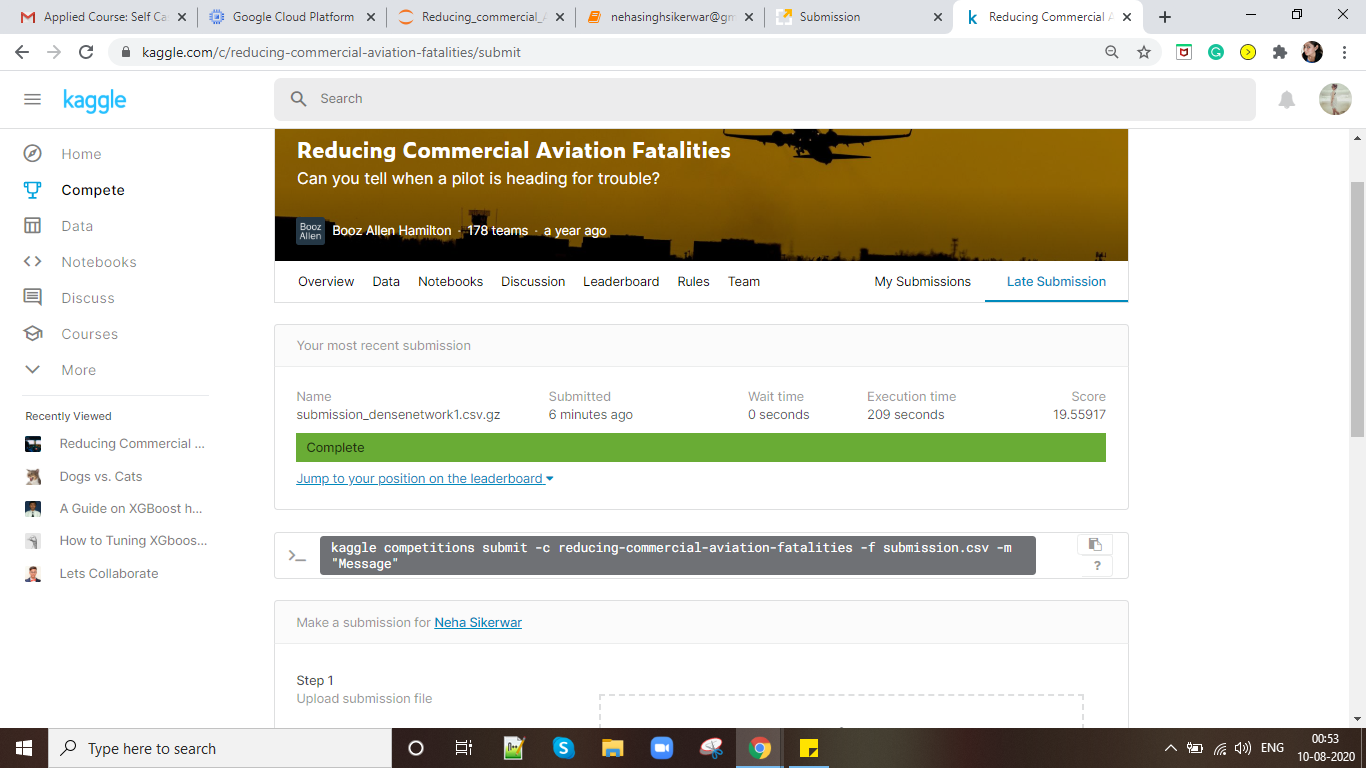

## AdaBoostClassifier

In [6]:
df=new_train.sample(90000).copy()
df.reset_index(inplace = True)
y=df['event']
df=df.drop('event',axis=1)
df=df.drop('index',axis=1)
df=df.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(df, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((72000, 120), (18000, 120), 72000, 18000)

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import uniform, randint

a_cfl=AdaBoostClassifier()
prams={'learning_rate':uniform(0.01, 0.4),
     'n_estimators':randint(50,200)}

random_cfl=RandomizedSearchCV(a_cfl,param_distributions=prams,verbose=10,n_jobs=-1)
random_cfl.fit(train_df, y_train)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 15.4min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 16.7min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.0min finished


{'learning_rate': 0.3970066479726446, 'n_estimators': 104}


In [6]:
# full data

y=new_train['event']
new_train=new_train.drop('event',axis=1)
new_train=new_train.drop(featr,axis=1)
train_df, val_df, y_train, y_val = train_test_split(new_train, y, stratify=y, test_size=0.2, random_state=32)
train_df.shape, val_df.shape, len(y_train), len(y_val)

((3346256, 120), (836564, 120), 3346256, 836564)

In [7]:
from sklearn.ensemble import AdaBoostClassifier

cfl=AdaBoostClassifier(learning_rate=0.3970066479726446, n_estimators=104)
cfl.fit(train_df, y_train)

predict_y = cfl.predict_proba(train_df)
print("The train log loss is:",log_loss(y_train, predict_y))
predict_y = cfl.predict_proba(val_df)
print("The cross validation log loss is:",log_loss(y_val, predict_y))

The train log loss is: 1.30277666504951
The cross validation log loss is: 1.3028351930202728


# Summary

In [29]:
df=pd.DataFrame(data=[['Random Model',1.6455166263817762],['LGBMClassifier',0.04811346513573305],
                     ['xgbClassifier 1',0.0008236892036873947],['Random Forest',0.11121686718047841],
                     ['CatBoost',0.00133690021],['SVM',0.8698199539967327],['Logistic Regression',0.8526577092862271],
                     ['xgb.cv',0.047419433995244564],['xgbClassifier 2',0.000754514872950122],
                     ['xgbClassifier 3 : hyperopt',0.11309],['Deep neural network: CNN-1D',0.4505651593208313],
                     ['Dense Neural Network',0.3487970232963562],['AdaBoostClassifier',1.3028351930202728]],
                     columns=['Model','Validation Loss'])
df

Model  Validation Loss
0                  Random Model         1.645517
1                LGBMClassifier         0.048113
2               xgbClassifier 1         0.000824
3                 Random Forest         0.111217
4                      CatBoost         0.001337
5                           SVM         0.869820
6           Logistic Regression         0.852658
7                        xgb.cv         0.047419
8               xgbClassifier 2         0.000755
9    xgbClassifier 3 : hyperopt         0.113090
10  Deep neural network: CNN-1D         0.450565
11         Dense Neural Network         0.348797
12           AdaBoostClassifier         1.302835

xgbClassifier gave best performance (loss: 0.000755) of all.